# Machine Learning 

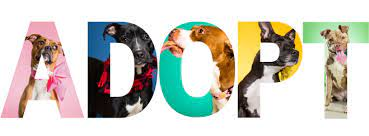

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ClassPredictionError

## Import data & review info
- all int/floats
- non-null
- no. of columns

In [2]:
adoption_cat_n_dog_only_v8_use_for_ml = \
pd.read_csv("C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/versions/adoption_cat_n_dog_only_v8_use_for_ml.csv")\
.drop(columns="Unnamed: 0")
adoption_cat_n_dog_only_v8_use_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7468 entries, 0 to 7467
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   istransfer                  7468 non-null   int64  
 1   diedoffshelter              7468 non-null   int64  
 2   puttosleep                  7468 non-null   int64  
 3   isdoa                       7468 non-null   int64  
 4   label                       7468 non-null   int64  
 5   intake_reason_stray_or_not  7468 non-null   int64  
 6   chipped_ornot               7468 non-null   int64  
 7   dead_or_alive               7468 non-null   int64  
 8   cats_n_dog                  7468 non-null   int64  
 9   No. of times Fostered       7468 non-null   int64  
 10  location_1                  7468 non-null   int64  
 11  location_2                  7468 non-null   int64  
 12  location_3                  7468 non-null   int64  
 13  location_4                  7468 

In [3]:
adoption_cat_n_dog_only_v8_use_for_ml.iloc[:, : 14].describe()

,istransfer,diedoffshelter,puttosleep,isdoa,label,intake_reason_stray_or_not,chipped_ornot,dead_or_alive,cats_n_dog,No. of times Fostered,location_1,location_2,location_3,location_4
count,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000
mean,0.006829,0.003348,0.018479,0.002276,0.369041,0.503615,0.837038,0.967327,0.454874,0.347616,0.308249,0.488484,0.464515,0.504419
std,0.082361,0.057766,0.134684,0.047660,0.885498,0.500020,0.369356,0.177791,0.497993,0.656640,0.461801,0.499901,0.498773,0.500014
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
adoption_cat_n_dog_only_v8_use_for_ml.iloc[:, 14 :].describe()

,Pure Breed or not,Domestic_short_hair_or_not,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5,new_age_in_years,Female,Male,Unknown,time_spent_in_shelter,returnedreason
count,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000
mean,0.241564,0.446572,0.233931,0.355383,0.433449,0.708623,0.533610,3.529440,0.474558,0.505356,0.020086,0.109415,-0.601098
std,0.428060,0.497171,0.423357,0.478661,0.495584,0.454427,0.498902,6.064081,0.499386,0.500005,0.140303,0.260984,0.592199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000027,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.014806,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.875000,0.000000,1.000000,0.000000,0.042257,-1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.166667,1.000000,1.000000,0.000000,0.112086,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.500000,1.000000,1.000000,1.000000,7.458904,1.000000


# Feature Selection

In [62]:
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
from colorama import init, Fore, Back, Style

import pyforest
import warnings
# warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn import metrics,preprocessing
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RepeatedStratifiedKFold, KFold
from sklearn.metrics import accuracy_score,recall_score, precision_score, \
f1_score, confusion_matrix, cohen_kappa_score, confusion_matrix, classification_report, roc_auc_score, log_loss, ConfusionMatrixDisplay, plot_confusion_matrix
import lazypredict
from lazypredict.Supervised import LazyClassifier



C:\Users\hi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### Step 1) Train test split!

In [189]:
a = adoption_cat_n_dog_only_v8_use_for_ml.drop(["label",'Male', 'diedoffshelter'], axis = 1)
b = adoption_cat_n_dog_only_v8_use_for_ml["label"]

a_train, a_test, b_train, b_test = train_test_split(a, b ,test_size=0.2, random_state=42)

### Feature importance

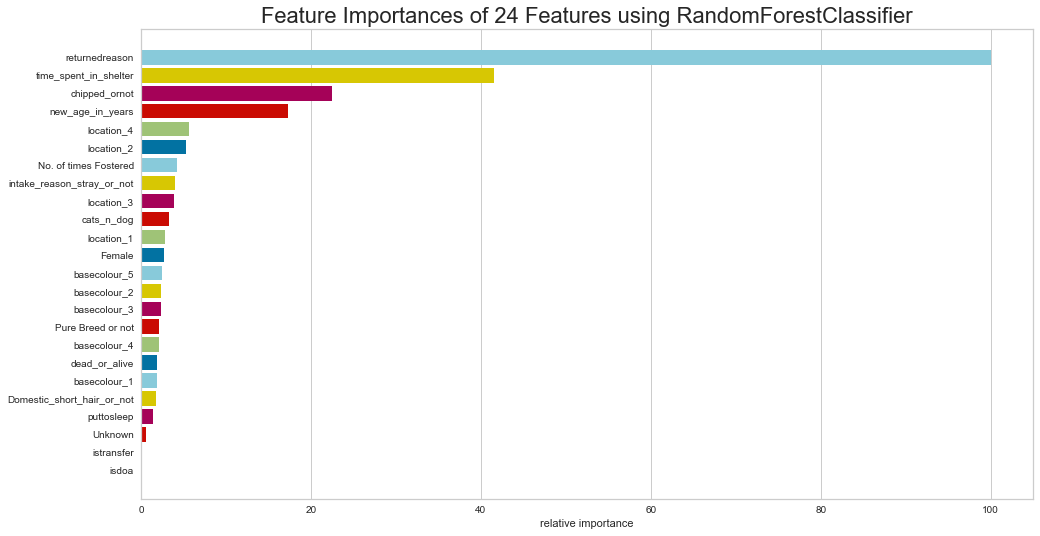

<AxesSubplot:title={'center':'Feature Importances of 24 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [247]:
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
plt.figure(figsize=(15,8))
viz = FeatureImportances(RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42, class_weight='balanced'))
viz.fit(a_train_stand, b_train)
viz.show()
# plt.figure(figsize=(15,8))
# pd.Series(random_forest.feature_importances_,a_train_stand.columns).sort_values(ascending=True).plot.barh(width=0.8)
# plt.title("Personalized")
# plt.show()

## __Feature dependency__ on our *LABEL*

#### 1 of 2: <font color = "red"> Illustrative Method

My colour theme:
['#e5d7c2', '#d3ab99', '#bc7f7f', '#9b586c', '#6d3657', '#371a36']


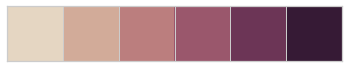

In [475]:
pal = sns.color_palette("ch:.25")
print("My colour theme:\n"+str(pal.as_hex()))
sns.palplot(pal)

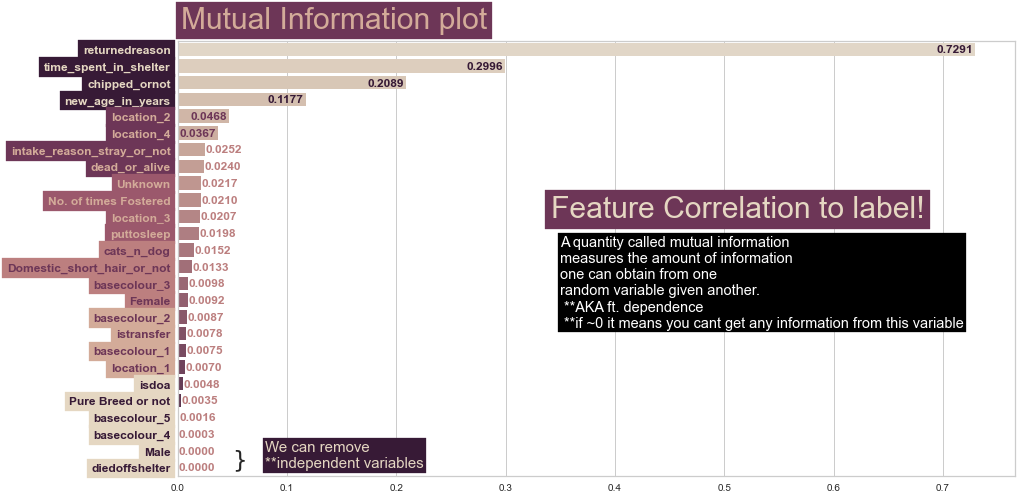

In [170]:
from sklearn.feature_selection import mutual_info_classif
x, y = adoption_cat_n_dog_only_v8_use_for_ml.drop(columns="label"), adoption_cat_n_dog_only_v8_use_for_ml['label']

plt.figure(figsize=(15,8))
meh = pd.Series(data=mutual_info_classif(x, y,random_state=42),index=x.columns).sort_values(ascending=False)
mehh = sns.barplot(x= meh, y = meh.index,orient="h",palette="ch:.25")
blank=[]
for bar in mehh.patches:
    width = bar.get_width()
    blank.append(width)
blank = pd.DataFrame({"width" :blank})
for bar in mehh.patches:
    width = bar.get_width()
    height = bar.get_height()
    x=bar.get_x()
    y=bar.get_y()
#     print(width)
    if width >0.0253:
        if width > blank.quantile(.85)[0]:
            plt.text(width-0.035, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#371a36",size = 12,weight ="demi",rotation = 0)
        elif width > blank.quantile(.71)[0]:
            plt.text(width-0.035, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#6d3657",size = 12,weight ="demi",rotation = 0)
        elif width > blank.quantile(0.57)[0]:
            plt.text(width-0.035, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#9b586c",size = 12,weight ="demi",rotation = 0)
        elif width > blank.quantile(0.43)[0]:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi",rotation = 0) 
        elif width > blank.quantile(0.29)[0]:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#d3ab99",size = 12,weight ="demi",rotation = 0)
        else:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#e5d7c2",size = 12,weight ="demi",rotation = 0)
    else:
#             plt.annotate('',c="#e5d7c2",weight='extra bold', size = 22, xy=(0,y+height/2), xytext=(-0.012, y+height/2),backgroundcolor='#371a36',
#             arrowprops=dict(facecolor='black', shrink=0.05,width =3,headwidth=8))
        if width > blank.quantile(.85)[0]:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi")

        elif width > blank.quantile(.71)[0]:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi")
        elif width > blank.quantile(0.57)[0]:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi")
        elif width > blank.quantile(0.43)[0]:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi") 
        elif width > blank.quantile(0.29)[0]:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi")
        else:
            plt.text(width+0.0005, y+0.7,'%.4f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi") 

#     if width >0:
#         plt.text(width+0.005, y+0.7,
#                 '%.2f'% float(width),
#                 ha='left', va='bottom',c = "darkred",size = 12,weight ="demi",rotation = 0)
#     else:
#         plt.text(width-0.035, y +0.7 ,
#                 '%.2f'% float(width),
#                 ha='left', va='bottom',c = "blue",size = 12,weight ="demi",rotation = 0)

for bar in mehh.patches:
    height = bar.get_height()
    y=bar.get_y()
    if round(float(width),3) == 0.000:
        plt.annotate(r"$\}$",fontsize=23,xy=(0.05,25))
        break
my_colors = ['#e5d7c2', '#d3ab99', '#d3ab99', '#6d3657', '#6d3657', '#371a36']
my_colorss = ['#e5d7c2', '#d3ab99', '#bc7f7f', '#9b586c', '#6d3657', '#371a36']
heh = []
hehe = []
for i in my_colors:
    for j in range(4):
        heh.append(i)
# print(heh)
if len(heh)< len(meh):
    for i in range(2):
        heh.append("#371a36")
my_colorss.reverse()
for i in my_colorss:
    for j in range(4):
        hehe.append(i)
if len(hehe)< len(meh):
    for i in range(3):
        hehe.append("#e5d7c2")
for ticklabel, tickcolor ,tc in zip(plt.gca().get_yticklabels(), heh,hehe):
    ticklabel.set_color(tickcolor)
    ticklabel.set_backgroundcolor(tc)
    ticklabel.set_fontweight('bold')
    ticklabel.set_size(12)
plt.text(x=0.08,y=25,s="We can remove\n**independent variables",backgroundcolor="#371a36",c="#e5d7c2",size=15)
plt.title("Feature Correlation to label!",c="#e5d7c2",backgroundcolor="#6d3657",x=0.669,y=0.58,size=30)
plt.suptitle("Mutual Information plot",c="#d3ab99",backgroundcolor="#6d3657",y=0.94,x=0.27)
plt.text(x=0.35,y=16.6,s="A quantity called mutual information\nmeasures the amount of information \n\
one can obtain from one \nrandom variable given another.\n **AKA ft. dependence\n \
**if ~0 it means you cant get any information from this variable",c="white",backgroundcolor = "black",size=14.5)
plt.show()

### 2 of 2 <font color = "pink"> Quick method </font>**no embellishments

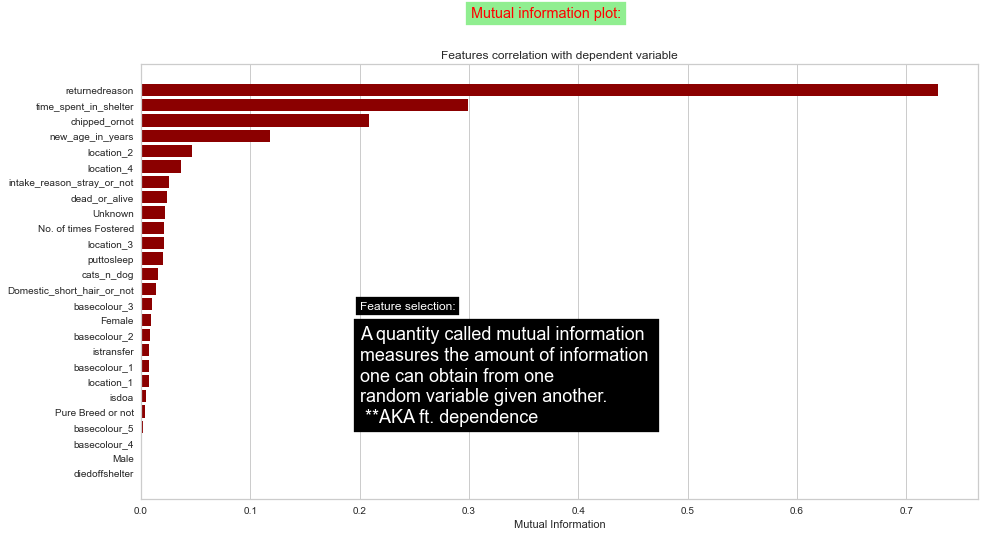

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [11]:
x, y = adoption_cat_n_dog_only_v8_use_for_ml.drop(columns="label"), adoption_cat_n_dog_only_v8_use_for_ml['label']
features = np.array(adoption_cat_n_dog_only_v8_use_for_ml.drop(columns="label").columns)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features,color='darkred',method='mutual_info-classification', sort=True,random_state=42)
plt.figure(figsize = (15,8))
plt.text(x=0.2,y=11.2,s="Feature selection:",c="white",backgroundcolor = "black")
plt.text(x=0.2,y=3.8,s="A quantity called mutual information\nmeasures the amount of information \n\
one can obtain from one \nrandom variable given another.\n **AKA ft. dependence",c="white",backgroundcolor = "black",size=18)
visualizer.fit(x, y,random_state=42)        # Fit the data to the visualizer
plt.suptitle("Mutual information plot:",c="Red",backgroundcolor="lightgreen")
visualizer.show()   
#https://machinelearningmastery.com/information-gain-and-mutual-information/

##### i can make my model more efficient if i dropped <font color ="red"> isdoa, Male, dedoffshelter & istransfer </font> since the label does not depend on these features

##### Relatively non correlated other than chipped_or_not -> Multi co-linearity issue which largely only affects regression

## __Feature correlation__ to our *LABEL*

### - 1 of 3: <font color ="red"> Illustrative method </font>for *Feature correlation*

-0.021621711158734694
-0.042121310784059146
-0.05755185535815045


Text(0.0, 1.0, 'Feature Correlation to label!')

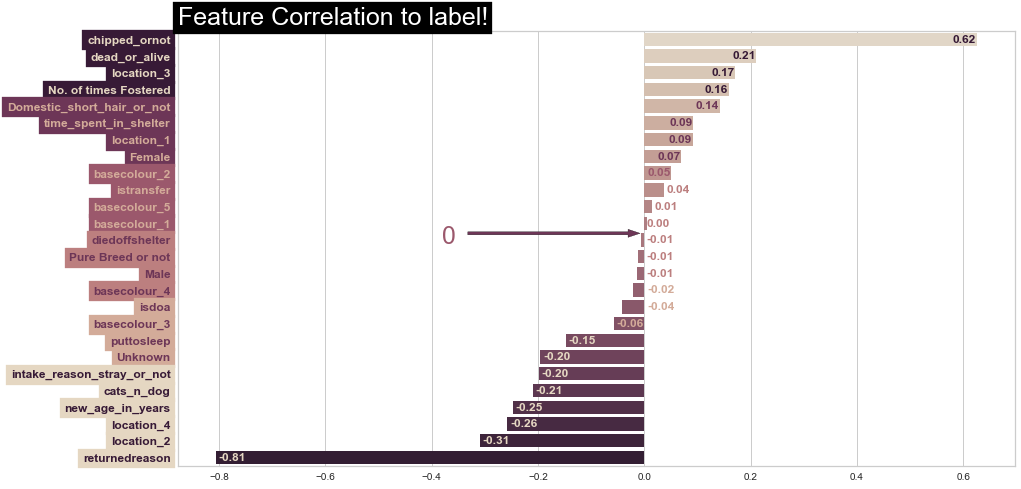

In [109]:
plt.figure(figsize=(15,8))
meh = adoption_cat_n_dog_only_v8_use_for_ml.drop(columns="label")\
.corrwith(adoption_cat_n_dog_only_v8_use_for_ml["label"]).sort_values(ascending=False)
mehh = sns.barplot(x= meh, y = meh.index.to_list(),orient="h",palette="ch:.25")
blank=[]
for bar in mehh.patches:
    width = bar.get_width()
    blank.append(width)
blank = pd.DataFrame({"width" :blank})
for bar in mehh.patches:
    width = bar.get_width()
    height = bar.get_height()
    x=bar.get_x()
    y=bar.get_y()
    if width > blank.quantile(.85)[0]:
        plt.text(width-0.045, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#371a36",size = 12,weight ="demi",rotation = 0)
    elif width > blank.quantile(.71)[0]:
        if width <0.045:
            plt.text(width+0.005, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi",rotation = 0) 
        else:
            plt.text(width-0.045, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#6d3657",size = 12,weight ="demi",rotation = 0)
    elif width > blank.quantile(0.57)[0]:
        if width <0.001:
            plt.text(0.005, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi",rotation = 0)
        elif width < 0.045:
            plt.text(width+0.005, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi",rotation = 0)
        else:
            plt.text(width-0.045, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#9b586c",size = 12,weight ="demi",rotation = 0)
    elif width > blank.quantile(0.43)[0]:
        if width <0.05:
            plt.text(0.004, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi",rotation = 0) 
#         elif width >0.01:
#             plt.text(width+0.0045, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi",rotation = 0)
        else:
            plt.text(width +0.004, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#bc7f7f",size = 12,weight ="demi",rotation = 0)
    elif width > blank.quantile(0.29)[0]:
        print(width)
        if width < -0.05:
            plt.text(width+0.005, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#d3ab99",size = 12,weight ="demi",rotation = 0)
        else:
            plt.text(0.005, y+0.7, '%.2f'% float(width), ha='left', va='bottom',c = "#d3ab99",size = 12,weight ="demi",rotation = 0)
    else:
        plt.text(width+0.005, y+0.7,'%.2f'% float(width),ha='left', va='bottom',c = "#e5d7c2",size = 12,weight ="demi",rotation = 0)
    
#     if width >0:
#         plt.text(width+0.005, y+0.7,
#                 '%.2f'% float(width),
#                 ha='left', va='bottom',c = "darkred",size = 12,weight ="demi",rotation = 0)
#     else:
#         plt.text(width-0.035, y +0.7 ,
#                 '%.2f'% float(width),
#                 ha='left', va='bottom',c = "blue",size = 12,weight ="demi",rotation = 0)
easier = dict(zip(sorted(np.arange(26)), meh.index.to_list()))
my_colors = ['#e5d7c2', '#d3ab99', '#d3ab99', '#6d3657', '#6d3657', '#371a36']
my_colorss = ['#e5d7c2', '#d3ab99', '#bc7f7f', '#9b586c', '#6d3657', '#371a36']
heh = []
hehe = []
for i in my_colors:
    for j in range(4):
        heh.append(i)
# print(heh)
if len(heh)< len(meh):
    for i in range(2):
        heh.append("#371a36")
my_colorss.reverse()
for i in my_colorss:
    for j in range(4):
        hehe.append(i)
if len(hehe)< len(meh):
    for i in range(3):
        hehe.append("#e5d7c2")
for ticklabel, tickcolor ,tc in zip(plt.gca().get_yticklabels(), heh,hehe):
    ticklabel.set_color(tickcolor)
    ticklabel.set_backgroundcolor(tc)
    ticklabel.set_fontweight('bold')
    ticklabel.set_size(12)
plt.annotate('',weight='extra bold', size = 15, xy=(0.01,14.5*0.8), xytext=(-0.35,14.5*0.8),
            arrowprops=dict(facecolor="#6d3657", shrink=0.05,width =3,headwidth=8),)
plt.text(-0.38,15.3*0.8,"0",c="#9b586c")
plt.title("Feature Correlation to label!",c="white",backgroundcolor="black",loc="left",size=25)

### - 2 of 3:  <font color = "blue">Quick method </font>for *feature correlation* with __text on bar ends__

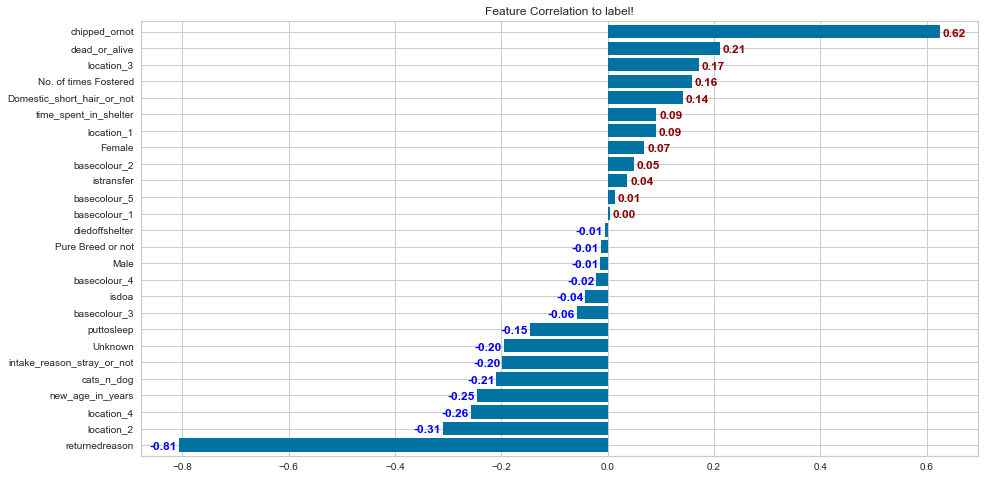

In [40]:
a = adoption_cat_n_dog_only_v8_use_for_ml.drop(columns="label")\
.corrwith(adoption_cat_n_dog_only_v8_use_for_ml["label"]).sort_values(ascending=True).plot.barh(width=0.8,figsize=(15,8))
plt.title("Feature Correlation to label!")
for bar in a.patches:
    width = bar.get_width()
    height = bar.get_height()
    x=bar.get_x()
    y=bar.get_y()
    if width >0:
        plt.text(width+0.005, y ,
                '%.2f'% float(width),
                ha='left', va='bottom',c = "darkred",size = 12,weight ="demi",rotation = 0)
    else:
        plt.text(width-0.055, y ,
                '%.2f'% float(width),
                ha='left', va='bottom',c = "blue",size = 12,weight ="demi",rotation = 0)

###  - 3 of 3: <font color = "pink"> Quickest method </font> with no embellishments

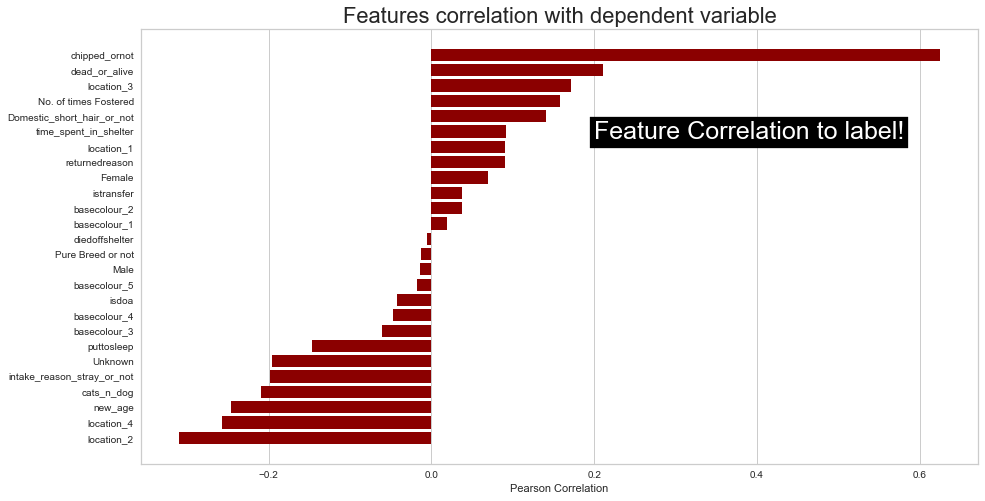

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [78]:
visualizer1 = FeatureCorrelation(labels=features,color='darkred', sort=True)
plt.figure(figsize = (15,8))
plt.text(x=0.2,y=20,s="Feature Correlation to label!",c="white",backgroundcolor = "black")
visualizer1.fit(x, y)        # Fit the data to the visualizer
visualizer1.show()  

## Feature relation analysis: 
- Is the ML able to differentiate between the data:
### enough separability that a classification algorithm might be able to discern between each class

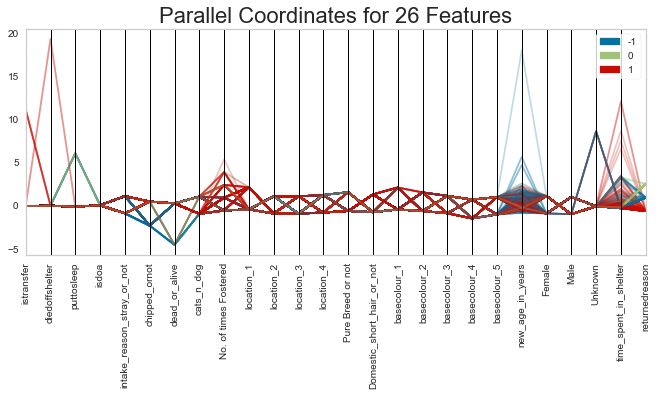

<AxesSubplot:title={'center':'Parallel Coordinates for 26 Features'}>

In [169]:
from yellowbrick.features import ParallelCoordinates
x, y = adoption_cat_n_dog_only_v8_use_for_ml.drop(columns="label"), adoption_cat_n_dog_only_v8_use_for_ml['label']
features = x.columns
classes = [-1,0,1]
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1, size = (800,300)
)
visualizer.fit(x, y)     
visualizer.transform(x)   
visualizer.ax.fig
visualizer.ax.tick_params(axis='x', labelrotation=90.)
visualizer.poof()

## __Feature correlation__ to each *other*

<AxesSubplot:>

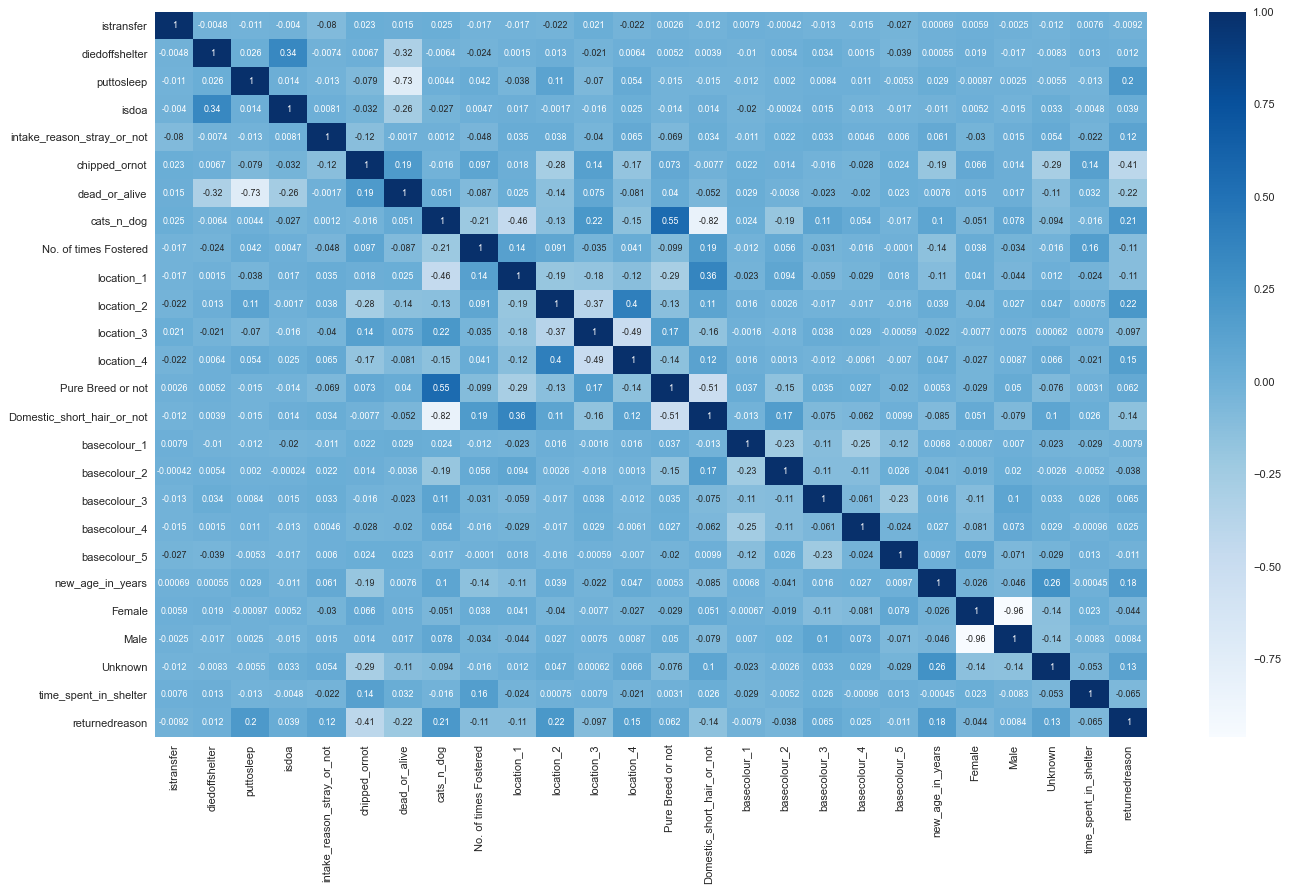

In [182]:
x, y = adoption_cat_n_dog_only_v8_use_for_ml.drop(columns="label"), adoption_cat_n_dog_only_v8_use_for_ml['label']
corr = x.corr()
from matplotlib.pyplot import figure
figure(figsize=(20,12 ), dpi=80)
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap="Blues", annot=True, annot_kws={"fontsize":8})

### Correlation justification:
- Put to sleep and Dead or alive is different although highly related -> Not all who are dead were put to sleep
- im dropping male since the mutual info graph showed that i got 0 info from it
- Domestic short hair was the most abandoned breed for both cats and dogs in the shelter and hence explains the high correlation

# Feature analysis commentary:
Multi-colinearity:
- Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions AKA Model interpretation difficulty

### From our Mutual info graph we could remove:
- 'Male', 'diedoffshelter'

In [188]:
pd.Series(data=mutual_info_classif(x, y,random_state=42),index=x.columns).sort_values(ascending=False)[pd.Series(data=mutual_info_classif(x, y,random_state=42),index=x.columns).sort_values(ascending=False)<0.0001].index.to_list()

['Male', 'diedoffshelter']

In [63]:
sklearn.__version__

<IPython.core.display.Javascript object>

'0.23.1'

### Standardize data
- rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1 
- centering the data.

In [190]:
# https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
 # -> Standardize -> rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. -> centering the data.
from sklearn.preprocessing import StandardScaler
num_cols = ["No. of times Fostered","new_age_in_years","time_spent_in_shelter"] #my numerical columns (rest are binary)
a_train_stand = a_train.copy() #convert array to DF
a_test_stand = a_test.copy()
# apply standardization on numerical features
for i in num_cols:
    # fit        on training data column
    sc    = StandardScaler().fit(a_train_stand[[i]])
    
    # transform the training data column
    a_train_stand[i] = sc.transform(a_train_stand[[i]])
    
    # transform the testing data column
    a_test_stand[i] = sc.transform(a_test_stand[[i]])

## Normalize data

In [200]:
# range between 0 to 1. So, normalization would not affect their values
# fit scaler on training data
norm = MinMaxScaler().fit(a_train)

# transform training data
a_train_normz = norm.transform(a_train)

# transform testing dataabs
a_test_normz = norm.transform(a_test)

### Not scaled, Standardized & Normalized data

In [201]:
traina = [a_train, a_train_normz, a_train_stand]
testa  = [a_test,   a_test_normz, a_test_stand]

### SMOTEtomek = SMOTE + Tomek Links
- Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs

Before, the Counter({1: 3853, -1: 1650, 0: 471})
Class=1, n=3853 (64.496%)
Class=-1, n=1650 (27.620%)
Class=0, n=471 (7.884%)
after, the Counter({-1: 3848, 0: 3840, 1: 3835})
Class=1, n=3835 (33.281%)
Class=-1, n=3848 (33.394%)
Class=0, n=3840 (33.325%)


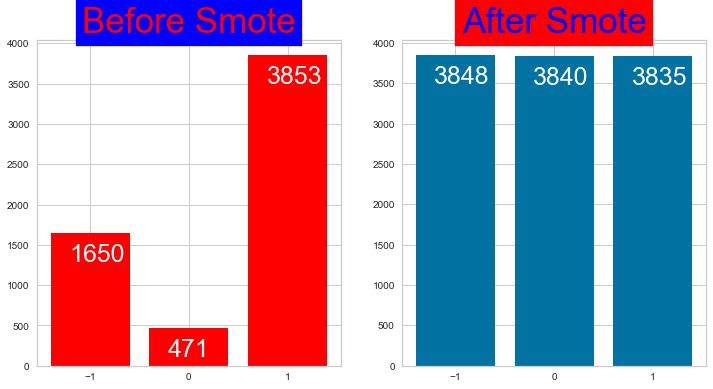

In [301]:
from imblearn.combine import SMOTETomek
from numpy import where
# a_train, a_test, b_train, b_test = train_test_split(a, b ,test_size=0.2, random_state=42)
counter = Counter(b_train)
print("Before, the", counter)
# over and undersample the train dataset using SMOTE + Tomek
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plt.subplot(1, 2, 1)
for k,v in counter.items():
        per = v / len(b_train) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
hoho = plt.bar(counter.keys(), counter.values(),color="red")
plt.title("Before Smote",c="red",backgroundcolor="blue",size=35)
for i in range(0,len(hoho.patches)):
    bar = pd.Series(hoho.patches).iloc[i]
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/4.3, height-350,'%d' % int(height),c="white")
plt.xticks([-1,0,1])                

smtom = SMOTETomek(random_state= 42)
a_train_smtom, b_train_smtom = smtom.fit_resample(a_train_stand, b_train)

counter = Counter(b_train_smtom)
print("after, the", counter)
plt.subplot(1, 2, 2)
for k,v in counter.items():
        per = v / len(b_train_smtom) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
hoho = plt.bar(counter.keys(), counter.values())
plt.title("After Smote",c="blue",backgroundcolor="red",size=35)
for i in range(0,len(hoho.patches)):
    bar = pd.Series(hoho.patches).iloc[i]
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/4.3, height-350,'%d' % int(height),c="white")
plt.xticks([-1,0,1])
plt.show()

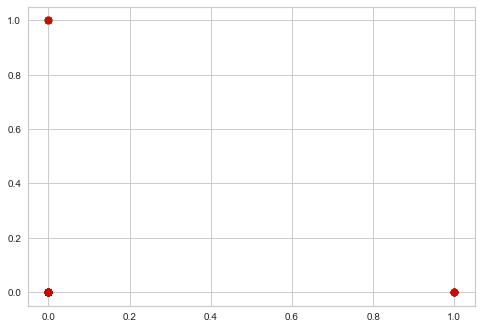

In [415]:
for i in [-1,0,1]:
    samples_ix = where(b_train_smtom == i)
    plt.scatter(a_train_smtom.to_numpy()[samples_ix, 0], a_train_smtom.to_numpy()[samples_ix, 1])
plt.show()

# Model <font color = "red">S<font color = "Orange">e<font color = "yellow">**l**<font color = "green">e<font color = "teal">c<font color = "cyan">t<font color = "blue">i<font color = "indigo">o<font color = "violet">n
- 1) <font color = "red"> **Lazy predict** </font>-> Suggest what models i should run
- 2) <font color = "orange"> **Hyperopt** </font> -> autoML
- 3) <font color = "#ffcc00"> **TPOT** </font> -> autoML

### #1 <font color ="Red"> **LazyPredictClassifier

In [195]:
lazy = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric = None, predictions = True)
models, predictions = lazy.fit(a_train_stand, a_test_stand, b_train, b_test)
print("for 'Adopted or not' multiclass-Label")
models

100%|██████████| 29/29 [01:02<00:00,  2.16s/it]

for 'Adopted or not' multiclass-Label


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.93,None,0.98,1.09
BaggingClassifier,0.98,0.93,None,0.98,0.17
RandomForestClassifier,0.98,0.93,None,0.98,0.68
DecisionTreeClassifier,0.97,0.93,None,0.97,0.04
LGBMClassifier,0.98,0.93,None,0.98,0.47
LinearDiscriminantAnalysis,0.98,0.92,None,0.98,0.09
ExtraTreesClassifier,0.97,0.92,None,0.97,0.45
ExtraTreeClassifier,0.96,0.91,None,0.96,0.02
QuadraticDiscriminantAnalysis,0.97,0.91,None,0.97,0.06


## <font color="blue">lets take the first 2, ROC AUC is None due to multi-class label

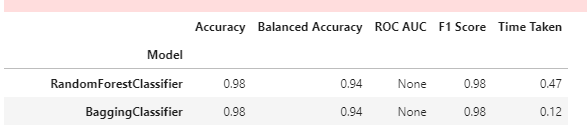

### #2 <font color ="Orange"> **HyperoptEstimator

#### step 1) Import

In [68]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


#### step 2) parameters

In [196]:
hyper = HyperoptEstimator(classifier=any_classifier('cla'), 
                          preprocessing=any_preprocessing('pre'), 
                          algo=tpe.suggest, max_evals=40, trial_timeout=30,seed=42)

#### step 3) fitting

In [197]:
hyper.fit(a_train_stand.to_numpy(),b_train.to_numpy())

100%|██████████| 40/40 [00:02<00:00,  2.91s/trial, best loss: 0.02175732217573223]


#### step 4) results

In [198]:
acc = hyper.score(a_train_stand.to_numpy(),b_train.to_numpy())
print("Accuracy: %f" % acc)
# summarize the best model
print(hyper.best_model())

Accuracy: 0.975226
{'learner': SVC(C=43.55045088966252, cache_size=512, degree=1, gamma=0.0028828818626642524,
    max_iter=234625374.0, random_state=1, shrinking=False,
    tol=0.0015963489030502776), 'preprocs': (PCA(n_components=24),), 'ex_preprocs': ()}


## HyperOptEstimator recommends <font color ="teal"> SVC model

### #3 <font color = "#ffcc00"> TPOT

In [310]:
from sklearn.model_selection import StratifiedKFold
from tpot import TPOTClassifier

cv = StratifiedKFold(n_splits=10)
# define TPOTClassifier
tpot  = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='roc_auc_ovr',          verbosity=2, random_state=42, n_jobs=4)
# performing the search for best fit
tpot.fit(a_train_stand, b_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9815713566763506

Generation 2 - Current best internal CV score: 0.981867915634296

Generation 3 - Current best internal CV score: 0.9819058511810427

Generation 4 - Current best internal CV score: 0.982054901453926

Generation 5 - Current best internal CV score: 0.982054901453926

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=1, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)


TPOTClassifier(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
               generations=5, n_jobs=4, population_size=50, random_state=42,
               scoring='roc_auc_ovr', verbosity=2)

In [312]:
print("roc_auc_ovr score:")
tpot.score(a_test_stand, b_test)

roc_auc_ovr score:


0.9803668502931683

### Lazy -> Random forest
### Hyperopt -> SVC
### TPOT -> XGB 

# <font color = "teal"> Method to conveniently call my metrics for evaluation

In [242]:
from termcolor import colored
from yellowbrick.classifier import ROCAUC
# predict()       is used to predict the actual class (In your case one of 0, 1 or 1).
# predict_proba() is used to predict the class probabilities
def metricss(a_train_stand,b_train,a_test_stand, b_test, b_pred_rf, b_pred_proba_rf, model): 
    print("number of train sample in train set:",a_train_stand.shape)
    print("Number of samples in validation set:",b_test.shape)
    print(Style.BRIGHT + Back.YELLOW + Fore.RED +"TRAINing", "with RF.score:",round(model.score(a_train_stand,b_train) * 100, 2)) #print accuracy score
    print("Log Loss:              "+"\033[0m"+ colored(log_loss(b_test, b_pred_proba_rf), 'white', 'on_red'),"* \033[1m\033[96mThe lower the better.\033[0m")
    print("ROC AUC (One-vs-one) :", colored(roc_auc_score(b_test, model.predict_proba(a_test_stand), multi_class='ovo'), 'white', 'on_red')," * \033[92mThe higher the better.\033[0m")
    print("ROC AUC (One-vs-rest):", colored(roc_auc_score(b_test, model.predict_proba(a_test_stand), multi_class='ovr'), 'white', 'on_red')," * \033[92msame ^\033[0m")
    print("-"*65)
    print(classification_report(b_test, b_pred_rf))
    print("-"*65)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
    normie = [None, "true"]
    titles = ["Confusion matrix, without normalization","Normalized confusion matrix"]
    
    for normalize, title, ax in zip(normie,titles, axes.flatten()):
        plt.rcParams.update({'font.size': 25,'axes.titlesize': 22})
        plot_confusion_matrix(model, a_test_stand, b_test, ax=ax, 
                              cmap='hot',normalize=normalize)
        ax.title.set_text(title)
        plt.title(title,c="red",backgroundcolor = "orange")
        ax.grid(b=None,which="major")
    plt.tight_layout()  
    plt.show()
    # Plot non-normalized confusion matrix
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model)
    # Fit the training data to the visualizer
    visualizer.fit(a_train_stand, b_train)
    # Evaluate the model on the test data
    visualizer.score(a_test_stand, b_test)
    # Draw visualization
    visualizer.show()
    print("Class counts",visualizer.class_counts_)
#     plot_confusion_matrix(model, a_test_stand, b_test, ax=ax,cmap="seismic")
    visualizer1 = ROCAUC(model, classes=[-1,0,1])
    visualizer1.fit(a_train_stand, b_train)        # Fit the training data to the visualizer
    visualizer1.score(a_test_stand, b_test)        # Evaluate the model on the test data
    visualizer1.show()                       # Finalize and render the figure
    plt.show()

### *** do note that for the ROCAUC Curve:
- one-vs-rest is Micro ROC
- one-vs-one  is Macro ROC

# <font color = "red"> RandomForest Classifier

In [205]:
# traina = [a_train, a_train_normz, a_train_stand] 
# testa  = [a_test,   a_test_normz, a_test_stand]
dictionary = {"unscaled": [a_train,a_test],  "normalised" : [a_train_normz,a_test_normz], "standardized" : [a_train_stand,a_test_stand]}

In [65]:
random_forest = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42, class_weight='balanced') #balance the imbalance
# random_forest.fit(a_train_stand, b_train)
# b_pred_rf       = random_forest.predict(a_test_stand)
# b_pred_proba_rf = random_forest.predict_proba(a_test_stand) # Predict class probabilities for X.

<IPython.core.display.Javascript object>

Not scaled!!!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 100.0
Log Loss:              0.10243527626924914 * The lower the better.
ROC AUC (One-vs-one) : 0.9791774040521516  * The higher the better.
ROC AUC (One-vs-rest): 0.9830746076943381  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       408
           0       0.93      0.81      0.86       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.96      0.93      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


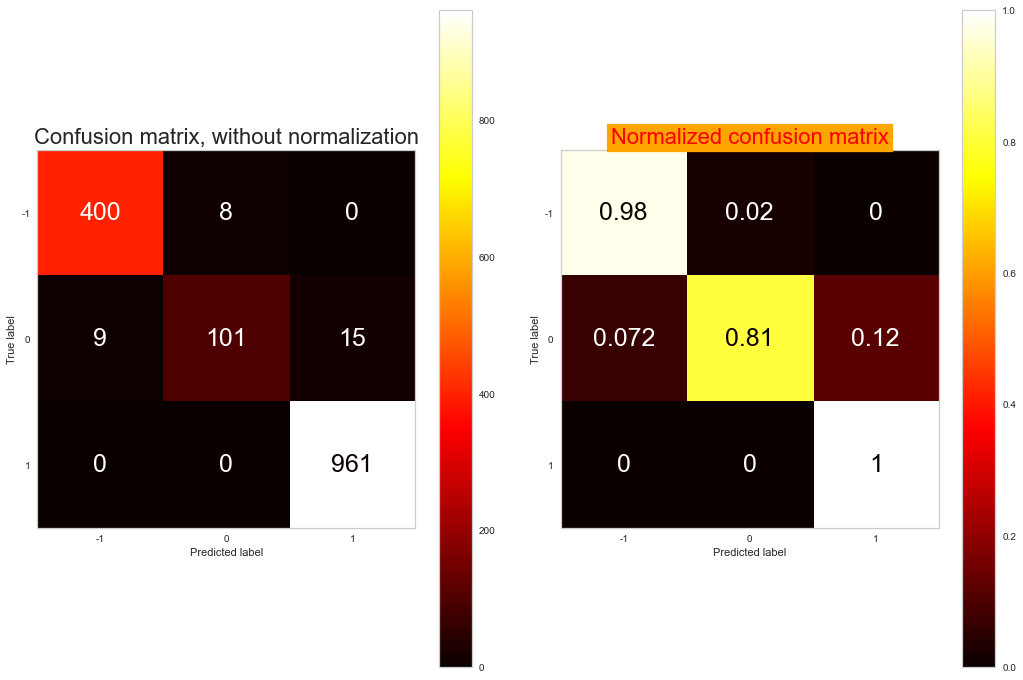

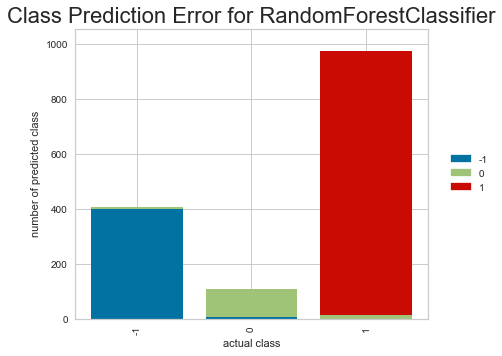

Class counts [1650  471 3853]


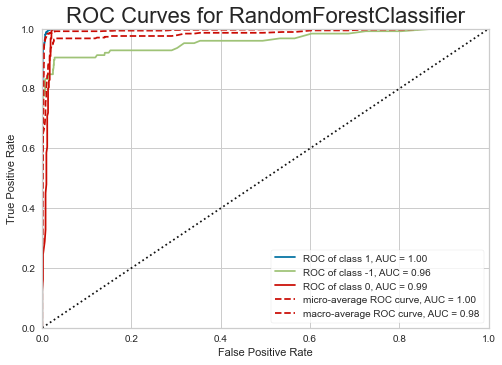

Normalised!!!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 100.0
Log Loss:              0.1021840561354754 * The lower the better.
ROC AUC (One-vs-one) : 0.9793772707487435  * The higher the better.
ROC AUC (One-vs-rest): 0.9832990755387098  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       408
           0       0.93      0.81      0.86       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.96      0.93      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


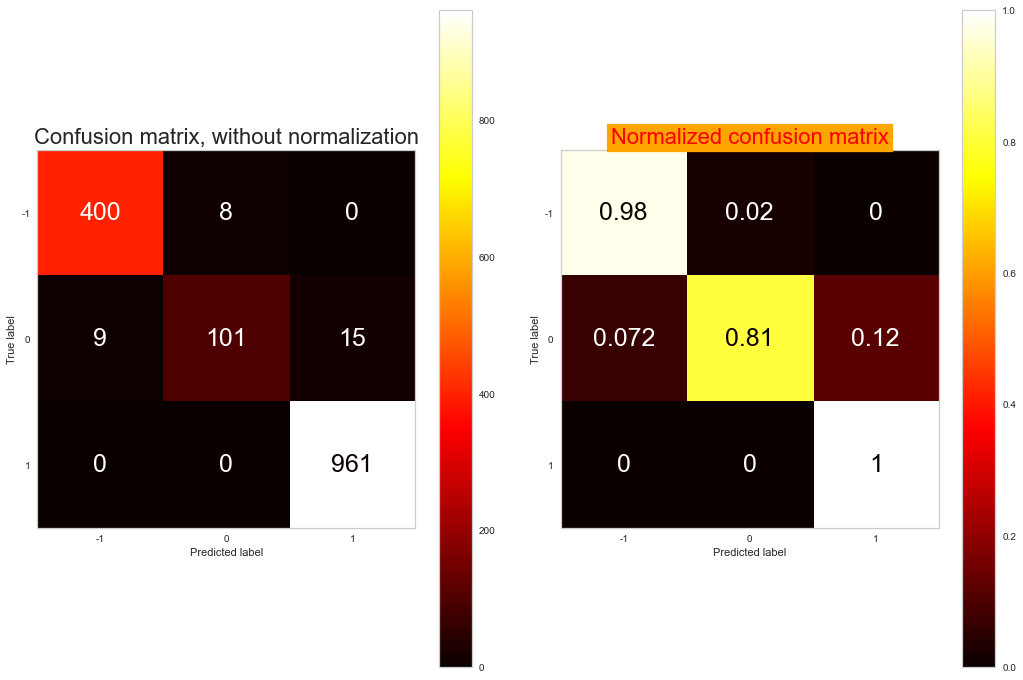

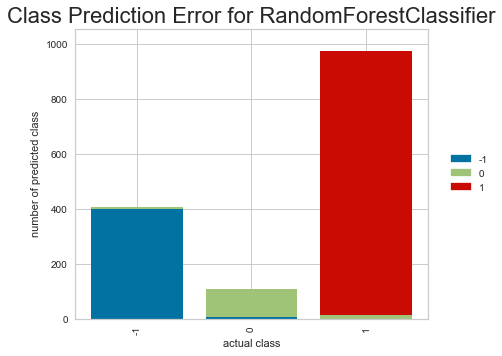

Class counts [1650  471 3853]


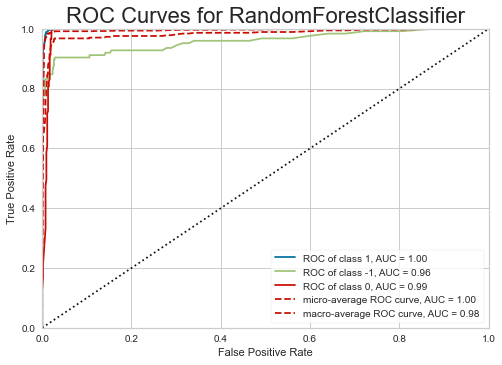

Standardised!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 100.0
Log Loss:              0.10246268026918709 * The lower the better.
ROC AUC (One-vs-one) : 0.9791895526854516  * The higher the better.
ROC AUC (One-vs-rest): 0.9830782553728911  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       408
           0       0.93      0.81      0.86       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.96      0.93      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


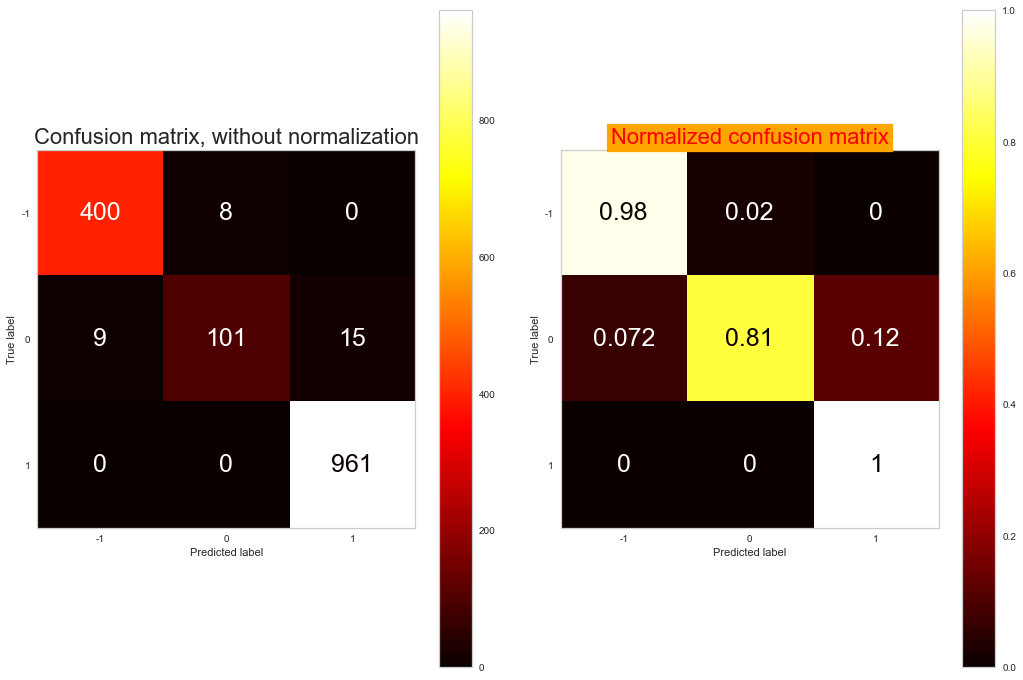

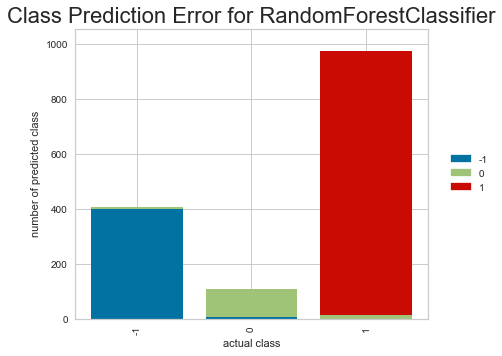

Class counts [1650  471 3853]


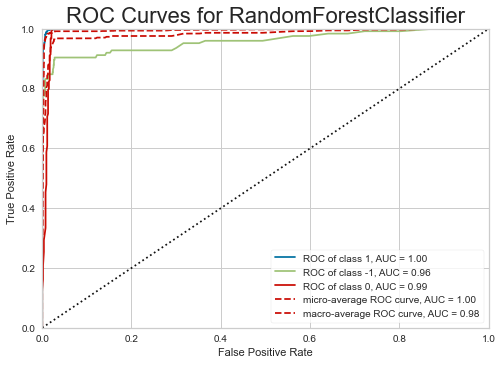

In [243]:
for k,v in dictionary.items():
    if k == "unscaled":
        random_forest.fit(v[0], b_train)
        pred = random_forest.predict(v[1])
        pred_proba = random_forest.predict_proba(v[1])
        # metricss(a_train_stand, b_train, a_test_stand, b_test, b_pred_rf, b_pred_proba_rf,       model): 
        print(Back.GREEN+"\033[1mNot scaled!!!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  random_forest)
    elif k == "normalised":
        random_forest.fit(v[0], b_train)
        pred = random_forest.predict(v[1])
        pred_proba = random_forest.predict_proba(v[1])
        print(Back.GREEN+"\033[1mNormalised!!!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  random_forest)
    else:
        random_forest.fit(v[0], b_train)
        pred = random_forest.predict(v[1])
        pred_proba = random_forest.predict_proba(v[1])
        print(Back.GREEN+"\033[1mStandardised!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  random_forest)

### Almost no difference at all! But noticeably either normalizing or standardising improved

## Smotetomek results

SmoteTomek!!!!!!!!!!
number of train sample in train set: (11523, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 100.0
Log Loss:              0.14091266293948082 * The lower the better.
ROC AUC (One-vs-one) : 0.9803006280902927  * The higher the better.
ROC AUC (One-vs-rest): 0.9842574384231834  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.99      0.94      0.97       408
           0       0.78      0.85      0.81       125
           1       0.98      0.99      0.99       961

    accuracy                           0.97      1494
   macro avg       0.92      0.93      0.92      1494
weighted avg       0.97      0.97      0.97      1494

-----------------------------------------------------------------


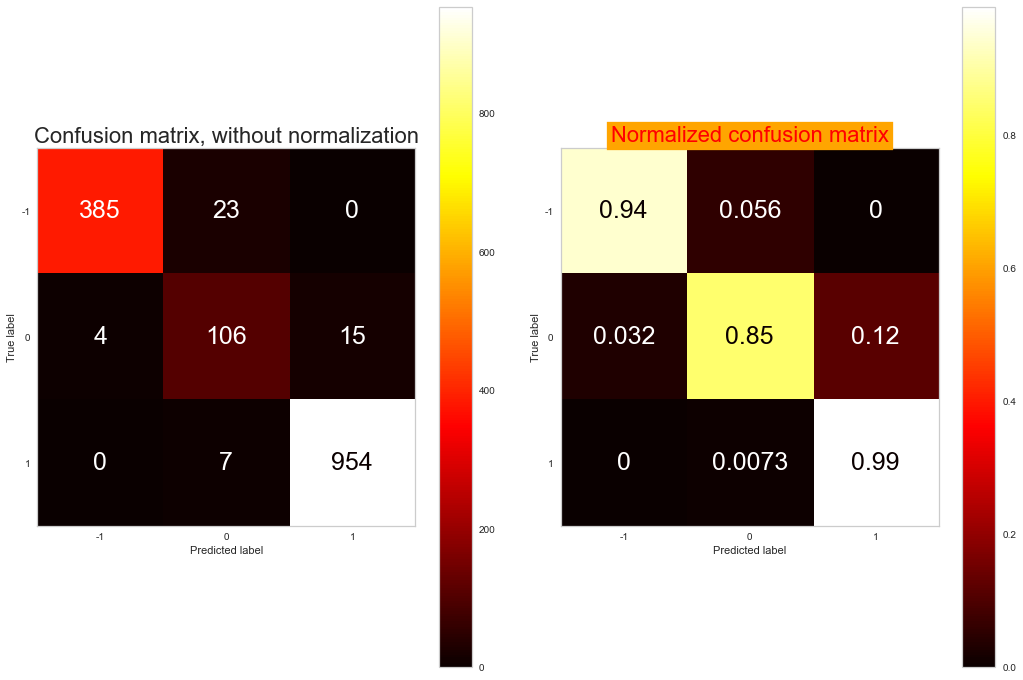

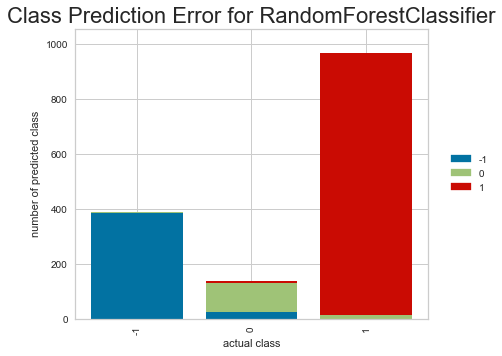

Class counts [3848 3840 3835]


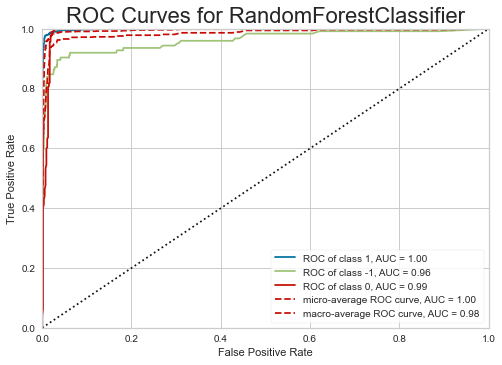

In [287]:
random_forest_smote = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42) #balance the imbalance
random_forest_smote.fit(a_train_smtom, b_train_smtom)
b_pred_rf       = random_forest_smote.predict(a_test_stand)
b_pred_proba_rf = random_forest_smote.predict_proba(a_test_stand) # Predict class probabilities for X.
# def metricss(a_train_stand, b_train, a_test_stand, b_test, b_pred_rf,       b_pred_proba_rf,       model): 
print(Back.GREEN+"\033[1mSmoteTomek!!!!!!!!!!\033[0m")
metricss(      a_train_smtom, b_train_smtom, a_test_stand, b_test, b_pred_rf, b_pred_proba_rf, random_forest_smote)

## Hyperparameter tuning

## #1 Grid Search~~

In [77]:
base_rf = RandomForestClassifier(random_state = 42, class_weight = "balanced") 

In [78]:
param_dict6 = { 'max_depth' : np.arange(10,20) , 
                'criterion': ['gini','entropy'],
                'n_estimators': np.arange(900,1000,5)}
grid_model = GridSearchCV(estimator= base_rf, param_grid = param_dict6 , verbose= 1,n_jobs=16, refit = True, \
                             cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=3,random_state=42))
grid_model.fit(a_train_stand, b_train)
grid_model.best_params_

Fitting 12 folds for each of 400 candidates, totalling 4800 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   21.7s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  3.0min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:  8.0min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed: 15.6min
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed: 25.8min
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed: 38.3min
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed: 53.0min
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed: 70.2min
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed: 90.1min
[Parallel(n_jobs=16)]: Done 4800 out of 4800 | elapsed: 108.7min finished


{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 975}

In [79]:
grid_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=975,
                       random_state=42)

## #2 Optuna

In [340]:
import optuna
def objective(trial):
#       iris = sklearn.datasets.load_iris()
    n_estimators = trial.suggest_int('n_estimators', 2, 1000)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    random_forest_smote = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 42,max_depth=max_depth) #balance the imbalance
    random_forest_smote.fit(a_train_smtom, b_train_smtom)
    b_pred_proba_rf = random_forest_smote.predict_proba(a_test_stand)
#     clf = random_forest_smote
    return log_loss(b_test, b_pred_proba_rf)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-06-12 05:43:08,928] A new study created in memory with name: no-name-22ce870e-221e-40f7-9e49-6114f0a71898
[I 2021-06-12 05:43:10,063] Trial 0 finished with value: 0.30035779897337495 and parameters: {'n_estimators': 128, 'max_depth': 6.101051371409121}. Best is trial 0 with value: 0.30035779897337495.
[I 2021-06-12 05:43:16,595] Trial 1 finished with value: 0.1418853989249978 and parameters: {'n_estimators': 583, 'max_depth': 29.45379667413291}. Best is trial 1 with value: 0.1418853989249978.
[I 2021-06-12 05:43:21,194] Trial 2 finished with value: 0.830471663608147 and parameters: {'n_estimators': 759, 'max_depth': 1.0628085060146186}. Best is trial 1 with value: 0.1418853989249978.
[I 2021-06-12 05:43:22,142] Trial 3 finished with value: 0.3674493673077322 and parameters: {'n_estimators': 94, 'max_depth': 5.711943759573759}. Best is trial 1 with value: 0.1418853989249978.
[I 2021-06-12 05:43:30,343] Trial 4 finished with value: 0.22972692067624803 and parameters: {'n_estimato

Accuracy: 0.1211218136306414
Best hyperparameters: {'n_estimators': 872, 'max_depth': 21.503956389618644}


SmoteTomek tuned!!!!!!!!!!
number of train sample in train set: (11523, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 100.0
Log Loss:              0.1211218136306414 * The lower the better.
ROC AUC (One-vs-one) : 0.9816682496446375  * The higher the better.
ROC AUC (One-vs-rest): 0.9853510580290917  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.99      0.94      0.97       408
           0       0.79      0.86      0.82       125
           1       0.99      0.99      0.99       961

    accuracy                           0.97      1494
   macro avg       0.92      0.93      0.93      1494
weighted avg       0.97      0.97      0.97      1494

-----------------------------------------------------------------


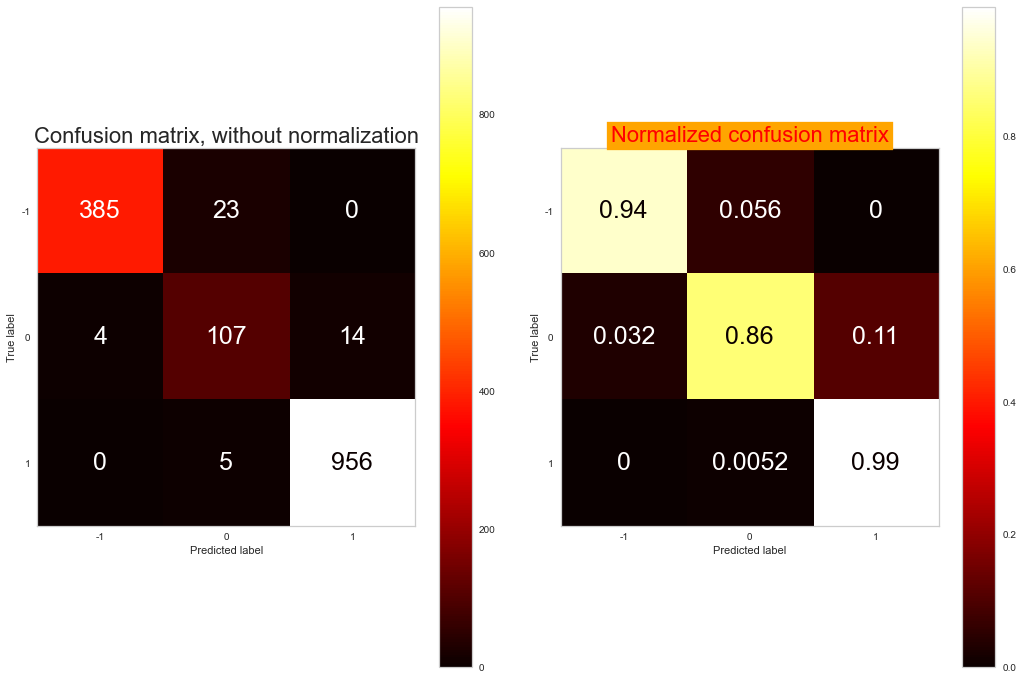

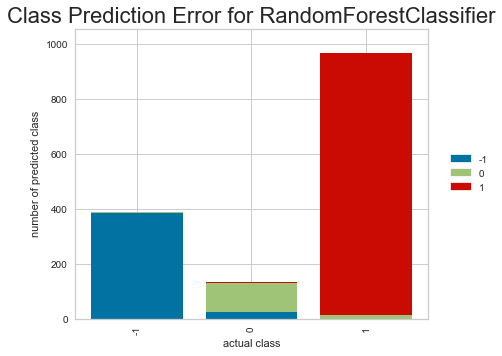

Class counts [3848 3840 3835]


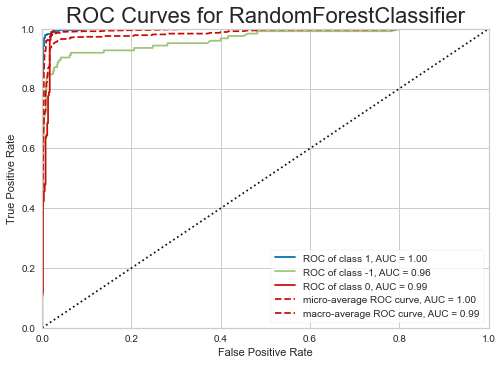

In [418]:
random_forest_smote_optuna = RandomForestClassifier(criterion='entropy', n_estimators=872,
                       random_state=42,max_depth = 21.503956389618644)
random_forest_smote_optuna.fit(a_train_smtom, b_train_smtom)
b_pred_rf_smote_tuned       = random_forest_smote_optuna.predict(a_test_stand)
b_pred_proba_rf_smote_tuned = random_forest_smote_optuna.predict_proba(a_test_stand)

print(Back.GREEN+"\033[1mSmoteTomek tuned!!!!!!!!!!\033[0m")
# def metricss(a_train_stand, b_train,       a_test_stand, b_test, b_pred_rf,             b_pred_proba_rf,              model): 
metricss(      a_train_smtom, b_train_smtom, a_test_stand, b_test, b_pred_rf_smote_tuned, b_pred_proba_rf_smote_tuned, random_forest_smote_optuna)

In [249]:
random_forest_tuned = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=16, n_estimators=975, random_state=42)
random_forest_tuned.fit(a_train_stand, b_train)
b_pred_rf_tuned       = random_forest_tuned.predict(a_test_stand)
b_pred_proba_rf_tuned = random_forest_tuned.predict_proba(a_test_stand)

number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 99.98
Log Loss:              0.10361275017913892 * The lower the better.
ROC AUC (One-vs-one) : 0.9817281494630458  * The higher the better.
ROC AUC (One-vs-rest): 0.9850405687251181  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       408
           0       0.94      0.82      0.88       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.97      0.94      0.95      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


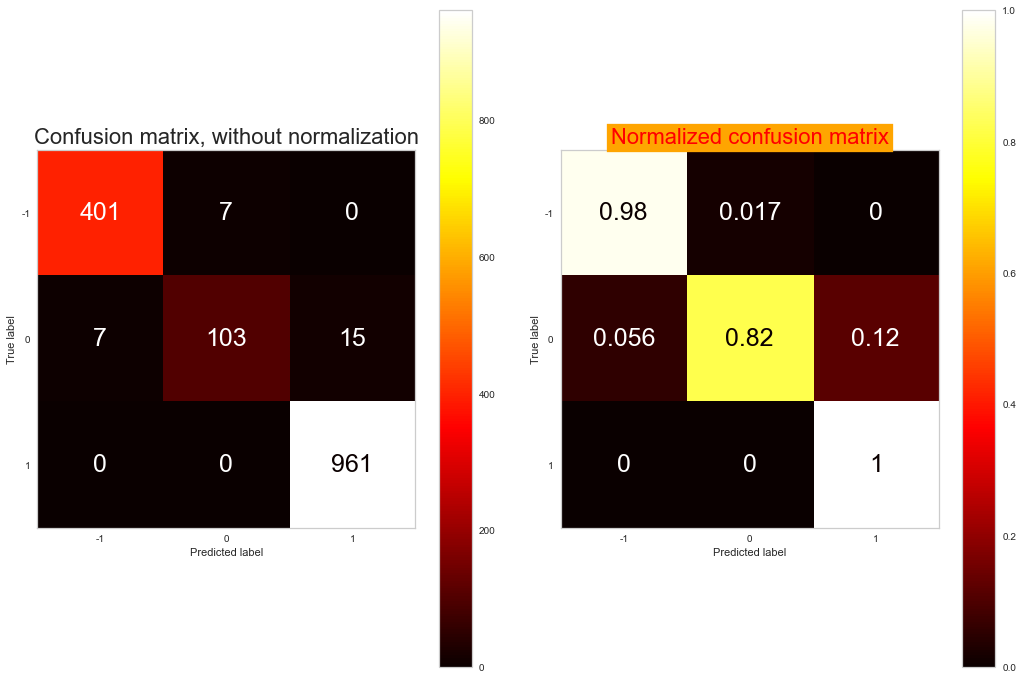

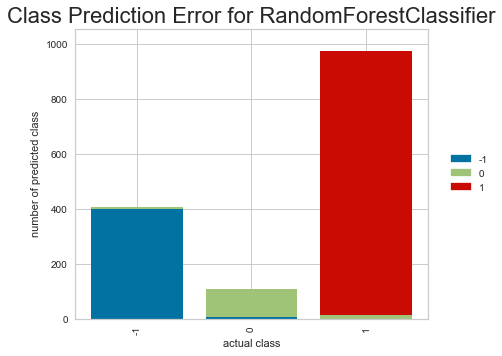

Class counts [1650  471 3853]


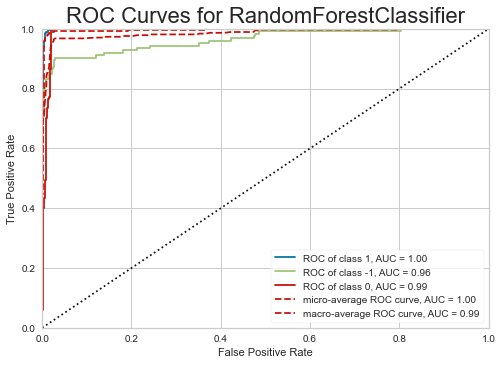

In [250]:
# def metricss(a_train_stand, b_train, a_test_stand, b_test, b_pred_rf,       b_pred_proba_rf,       model): 
metricss(      a_train_stand, b_train, a_test_stand, b_test, b_pred_rf_tuned, b_pred_proba_rf_tuned, random_forest_tuned)

### 1 more TP for -1 and 2 more TP for 0 ...
- it is an improvement for sure

## Grid for the SMOTE

In [ ]:
# random_forest.fit(a_train_smtom, b_train_smtom)
# b_pred_rf       = random_forest.predict(a_test_stand)
# b_pred_proba_rf = random_forest.predict_proba(a_test_stand) # Predict class probabilities for X.
# # def metricss(a_train_stand, b_train, a_test_stand, b_test, b_pred_rf,       b_pred_proba_rf,       model): 
# print(Back.GREEN+"\033[1mSmoteTomek!!!!!!!!!!\033[0m")
# metricss(      a_train_smtom, b_train_smtom, a_test_stand, b_test, b_pred_rf, b_pred_proba_rf, random_forest)

In [288]:
base_rf_smote = RandomForestClassifier(random_state = 42) 

In [289]:
param_dict = { 'max_depth' : np.arange(10,20) , 
                'criterion': ['gini','entropy'],
                'n_estimators': np.arange(900,1000,10)}
grid_model = GridSearchCV(estimator= base_rf_smote, param_grid = param_dict , verbose= 1,n_jobs=16, refit = True, \
                             cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=3,random_state=42))
grid_model.fit(a_train_smtom, b_train_smtom)
grid_model.best_params_

Fitting 12 folds for each of 200 candidates, totalling 2400 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.9s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  5.0min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed: 13.5min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed: 25.9min
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed: 42.7min
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed: 65.4min
[Parallel(n_jobs=16)]: Done 2400 out of 2400 | elapsed: 94.6min finished


{'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 900}

In [290]:
grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=900,
                       random_state=42)

SmoteTomek tuned!!!!!!!!!!
number of train sample in train set: (11523, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 99.95
Log Loss:              0.12204721377265978 * The lower the better.
ROC AUC (One-vs-one) : 0.9813587000877354  * The higher the better.
ROC AUC (One-vs-rest): 0.9851208693355318  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.99      0.94      0.97       408
           0       0.79      0.85      0.82       125
           1       0.98      0.99      0.99       961

    accuracy                           0.97      1494
   macro avg       0.92      0.93      0.92      1494
weighted avg       0.97      0.97      0.97      1494

-----------------------------------------------------------------


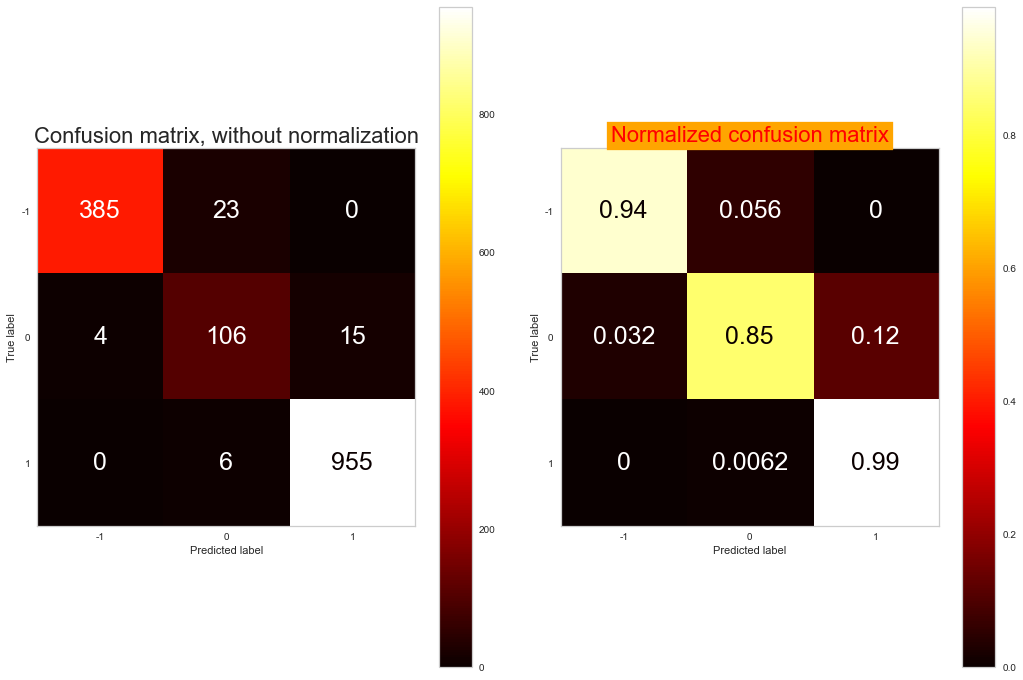

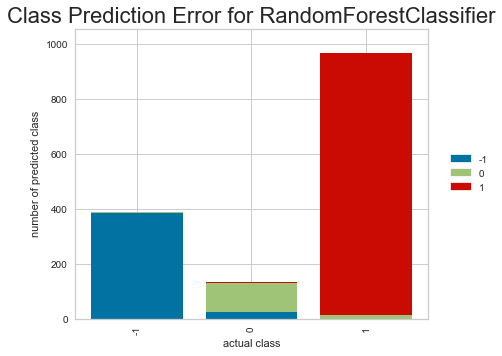

Class counts [3848 3840 3835]


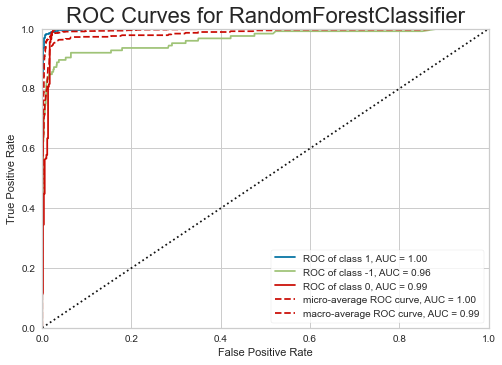

In [291]:
random_forest_smote_tuned = RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=900,
                       random_state=42)
random_forest_smote_tuned.fit(a_train_smtom, b_train_smtom)
b_pred_rf_smote_tuned       = random_forest_smote_tuned.predict(a_test_stand)
b_pred_proba_rf_smote_tuned = random_forest_smote_tuned.predict_proba(a_test_stand)

print(Back.GREEN+"\033[1mSmoteTomek tuned!!!!!!!!!!\033[0m")
# def metricss(a_train_stand, b_train,       a_test_stand, b_test, b_pred_rf,             b_pred_proba_rf,              model): 
metricss(      a_train_smtom, b_train_smtom, a_test_stand, b_test, b_pred_rf_smote_tuned, b_pred_proba_rf_smote_tuned, random_forest_smote_tuned)

# <font color="indigo"> Conclusion </font>
### Smote gives a better return on the adopted but returned class but worse, not adopted at all prediction. we have to way out which is more important.
## <font color="blue"> I personally think that the class balanced RF performs better

# <font color = "blue"> SVC

In [325]:
from sklearn import svm

In [316]:
support_vector  = svm.SVC(C=43.55045088966252, cache_size=512, degree=1, gamma=0.0028828818626642524, max_iter=234625374.0, random_state=42, shrinking=False, tol=0.0015963489030502776,probability=True) 

<IPython.core.display.Javascript object>

Not scaled!!!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 97.49
Log Loss:              0.11953568473968472 * The lower the better.
ROC AUC (One-vs-one) : 0.9634357559187393  * The higher the better.
ROC AUC (One-vs-rest): 0.9747612472765371  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       408
           0       1.00      0.75      0.86       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.98      0.92      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


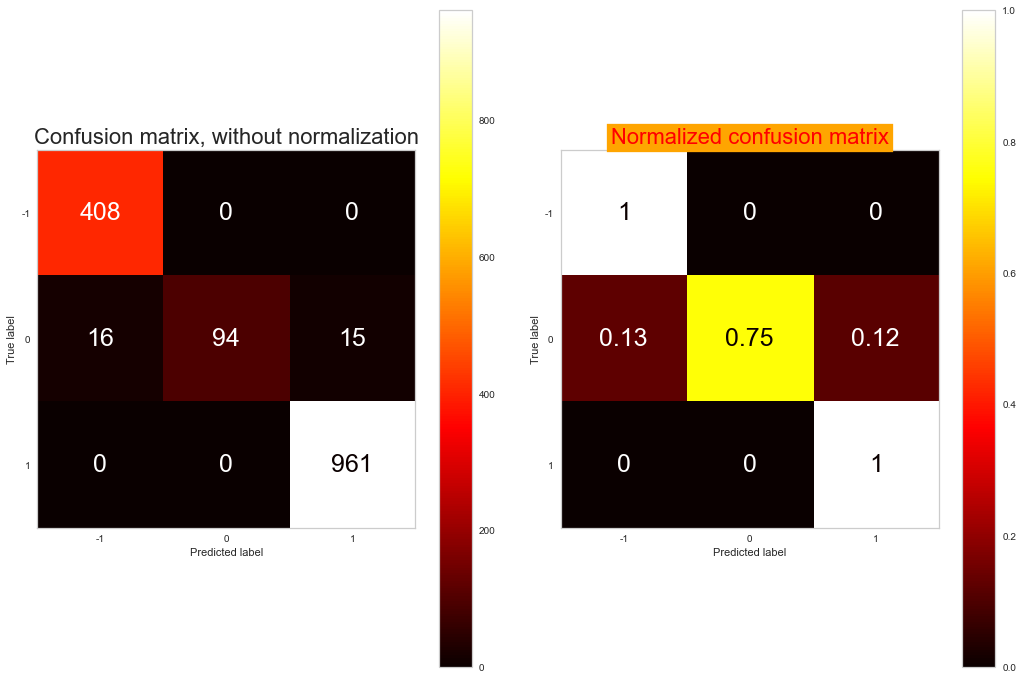

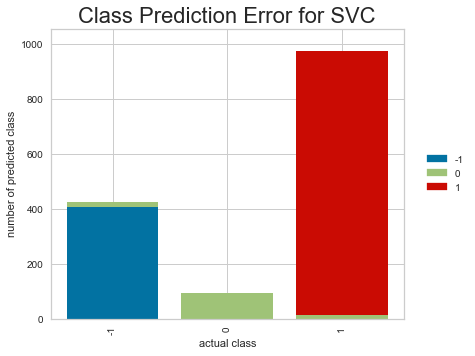

Class counts [1650  471 3853]


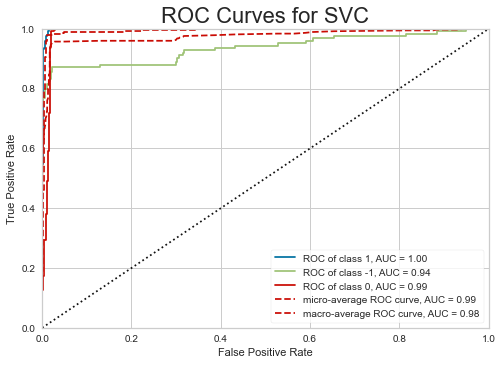

Normalised!!!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 97.47
Log Loss:              0.12752044578648455 * The lower the better.
ROC AUC (One-vs-one) : 0.9650315915474758  * The higher the better.
ROC AUC (One-vs-rest): 0.9755247894164777  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       408
           0       1.00      0.75      0.86       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.98      0.92      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


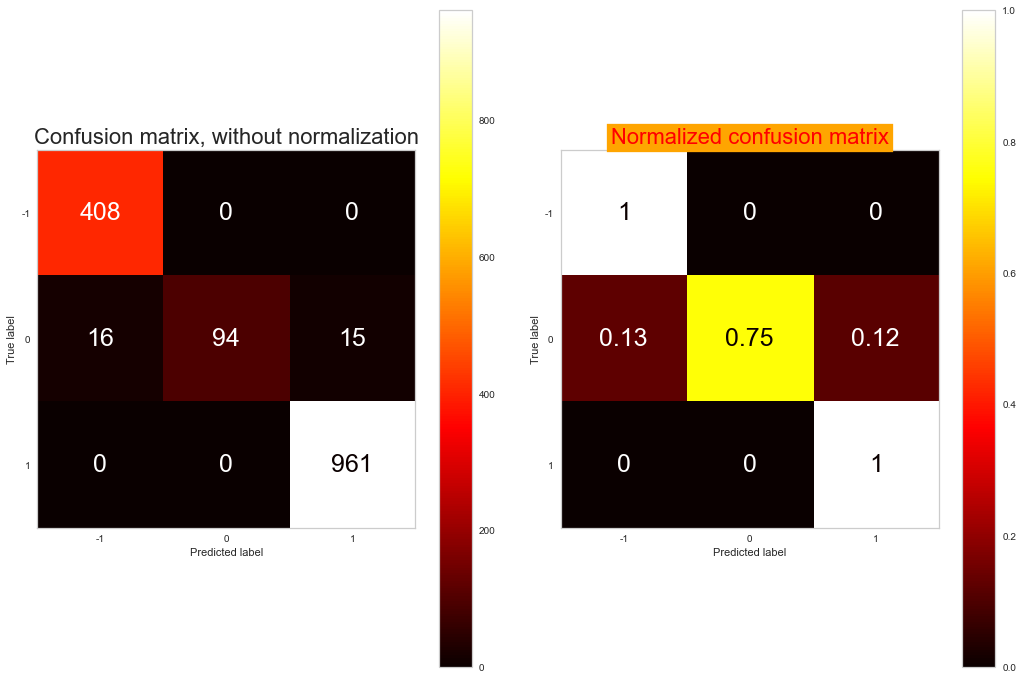

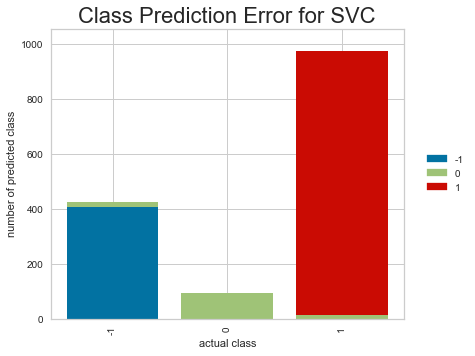

Class counts [1650  471 3853]


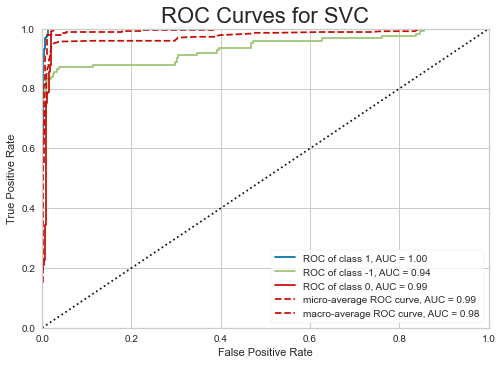

Standardised!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 97.52
Log Loss:              0.11802444817263633 * The lower the better.
ROC AUC (One-vs-one) : 0.9642616589473111  * The higher the better.
ROC AUC (One-vs-rest): 0.975346998890427  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       408
           0       0.99      0.75      0.85       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.98      0.92      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


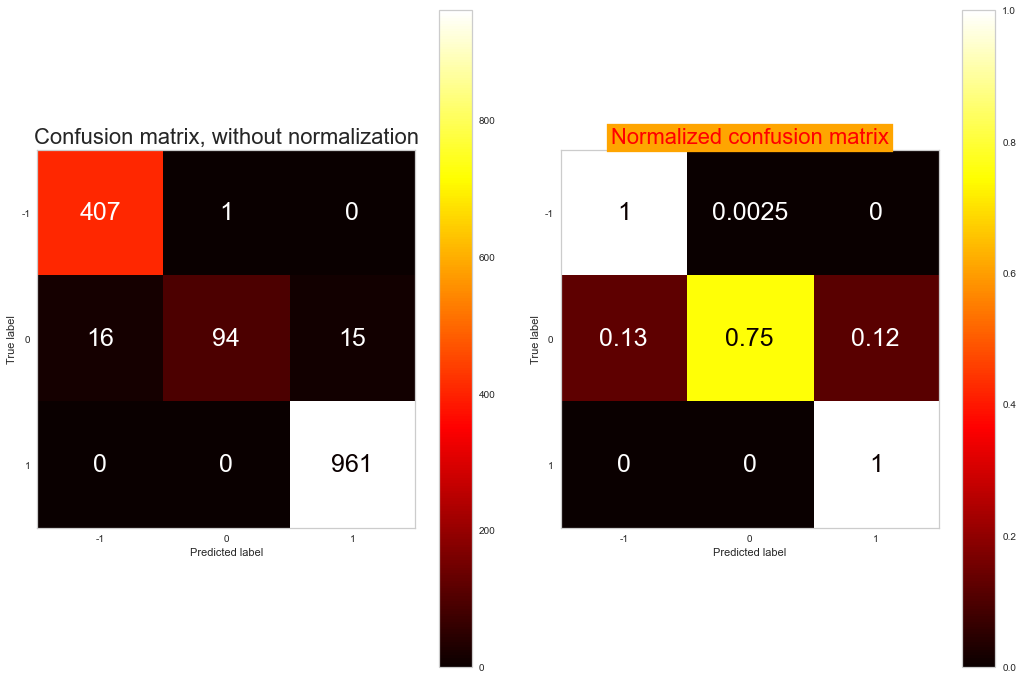

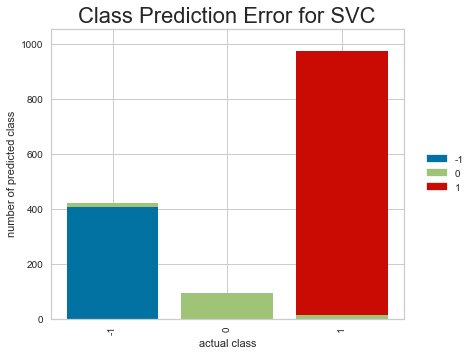

Class counts [1650  471 3853]


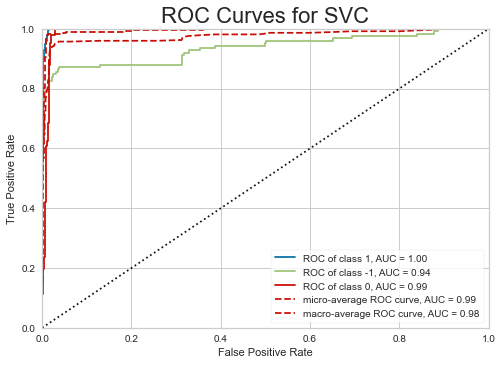

In [317]:
for k,v in dictionary.items():
    if k == "unscaled":
        support_vector.fit(v[0], b_train)
        pred = support_vector.predict(v[1])
        pred_proba = support_vector.predict_proba(v[1])
        # metricss(a_train_stand, b_train, a_test_stand, b_test, b_pred_rf, b_pred_proba_rf,       model): 
        print(Back.GREEN+"\033[1mNot scaled!!!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  support_vector)
    elif k == "normalised":
        support_vector.fit(v[0], b_train)
        pred = support_vector.predict(v[1])
        pred_proba = support_vector.predict_proba(v[1])
        print(Back.GREEN+"\033[1mNormalised!!!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  support_vector)
    else:
        support_vector.fit(v[0], b_train)
        pred = support_vector.predict(v[1])
        pred_proba = support_vector.predict_proba(v[1])
        print(Back.GREEN+"\033[1mStandardised!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  support_vector)

In [ ]:
# random_forest_smote_tuned = RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=900,
#                        random_state=42)
# random_forest_smote_tuned.fit(a_train_smtom, b_train_smtom)
# b_pred_rf_smote_tuned       = random_forest_smote_tuned.predict(a_test_stand)
# b_pred_proba_rf_smote_tuned = random_forest_smote_tuned.predict_proba(a_test_stand)

# print(Back.GREEN+"\033[1mSmoteTomek tuned!!!!!!!!!!\033[0m")
# # def metricss(a_train_stand, b_train,       a_test_stand, b_test, b_pred_rf,             b_pred_proba_rf,              model): 
# metricss(      a_train_smtom, b_train_smtom, a_test_stand, b_test, b_pred_rf_smote_tuned, b_pred_proba_rf_smote_tuned, random_forest_smote_tuned)

<IPython.core.display.Javascript object>

SmoteTomek tuned!!!!!!!!!!
number of train sample in train set: (11523, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 91.83
Log Loss:              0.17615771417689263 * The lower the better.
ROC AUC (One-vs-one) : 0.9654515754966573  * The higher the better.
ROC AUC (One-vs-rest): 0.9740726148722928  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.99      0.87      0.92       408
           0       0.66      0.85      0.74       125
           1       0.98      1.00      0.99       961

    accuracy                           0.95      1494
   macro avg       0.88      0.90      0.89      1494
weighted avg       0.96      0.95      0.95      1494

-----------------------------------------------------------------


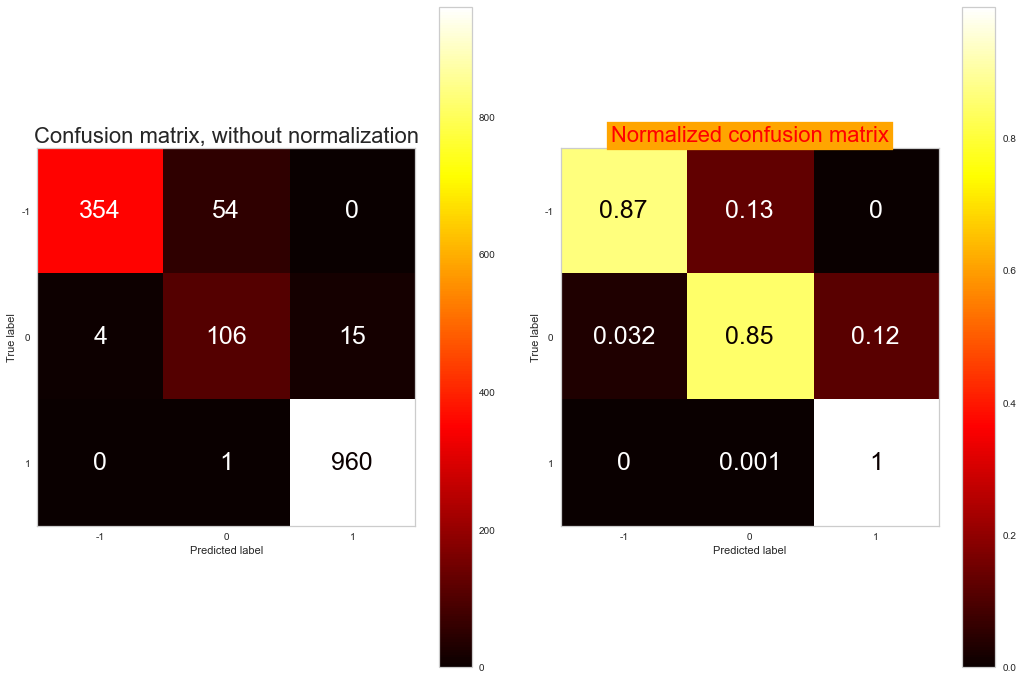

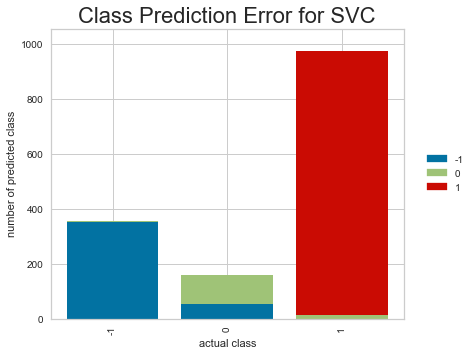

Class counts [3848 3840 3835]


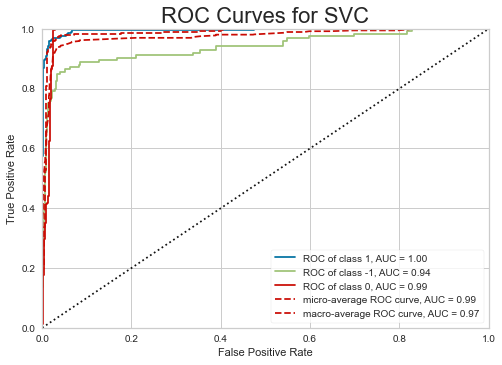

In [319]:
support_vector_tuned=svm.SVC(C=43.55045088966252, cache_size=512, degree=1, gamma=0.0028828818626642524, max_iter=234625374.0, random_state=42, shrinking=False, tol=0.0015963489030502776,probability=True) 
support_vector_tuned.fit(a_train_smtom, b_train_smtom)
b_pred_svc_smote_tuned       = support_vector_tuned.predict(a_test_stand)
b_pred_proba_svc_smote_tuned = support_vector_tuned.predict_proba(a_test_stand)

print(Back.GREEN+"\033[1mSmoteTomek tuned!!!!!!!!!!\033[0m")
# def metricss(a_train_stand, b_train,       a_test_stand, b_test, b_pred_rf,             b_pred_proba_rf,              model): 
metricss(      a_train_smtom, b_train_smtom, a_test_stand, b_test, b_pred_svc_smote_tuned, b_pred_proba_svc_smote_tuned, support_vector_tuned)

## random forest is better

## <font color="Green"> XGBOOST

In [331]:
from xgboost import XGBClassifier
boost = XGBClassifier( learning_rate=0.5, max_depth=1, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0,random_state =42)
boost.fit(a_train_stand, b_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=1,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=0)

Not scaled!!!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 97.71
Log Loss:              0.0791700865157313 * The lower the better.
ROC AUC (One-vs-one) : 0.9765716097746765  * The higher the better.
ROC AUC (One-vs-rest): 0.9803668502931683  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.97      0.98      0.98       408
           0       0.92      0.79      0.85       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.96      0.92      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


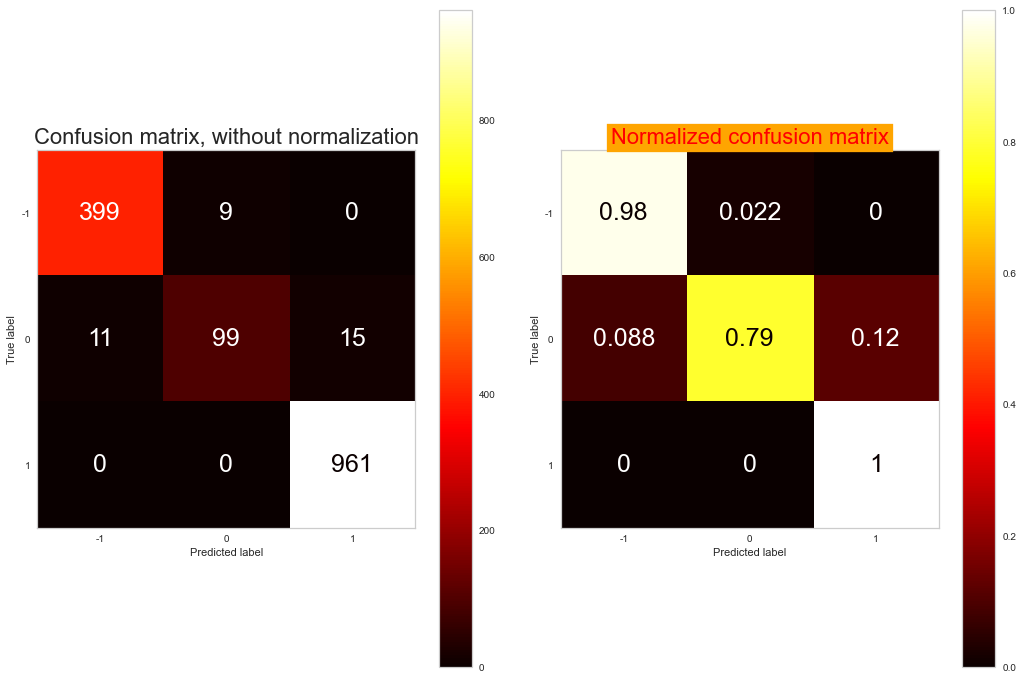

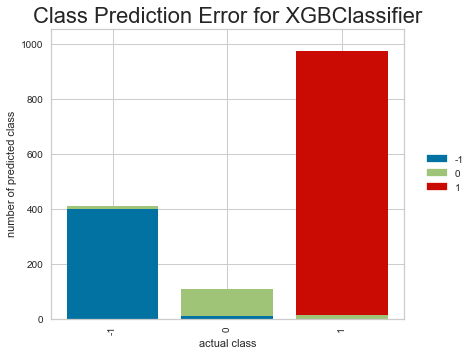

Class counts [1650  471 3853]


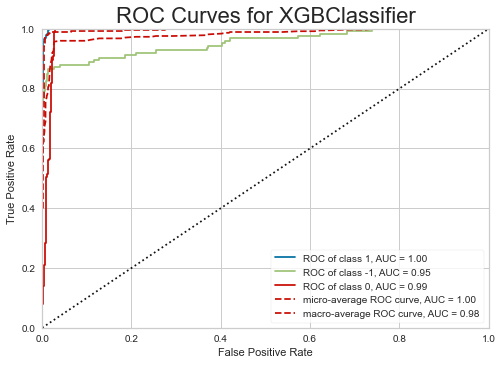

Normalised!!!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 97.71
Log Loss:              0.0791700865157313 * The lower the better.
ROC AUC (One-vs-one) : 0.9765716097746765  * The higher the better.
ROC AUC (One-vs-rest): 0.9803668502931683  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.97      0.98      0.98       408
           0       0.92      0.79      0.85       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.96      0.92      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


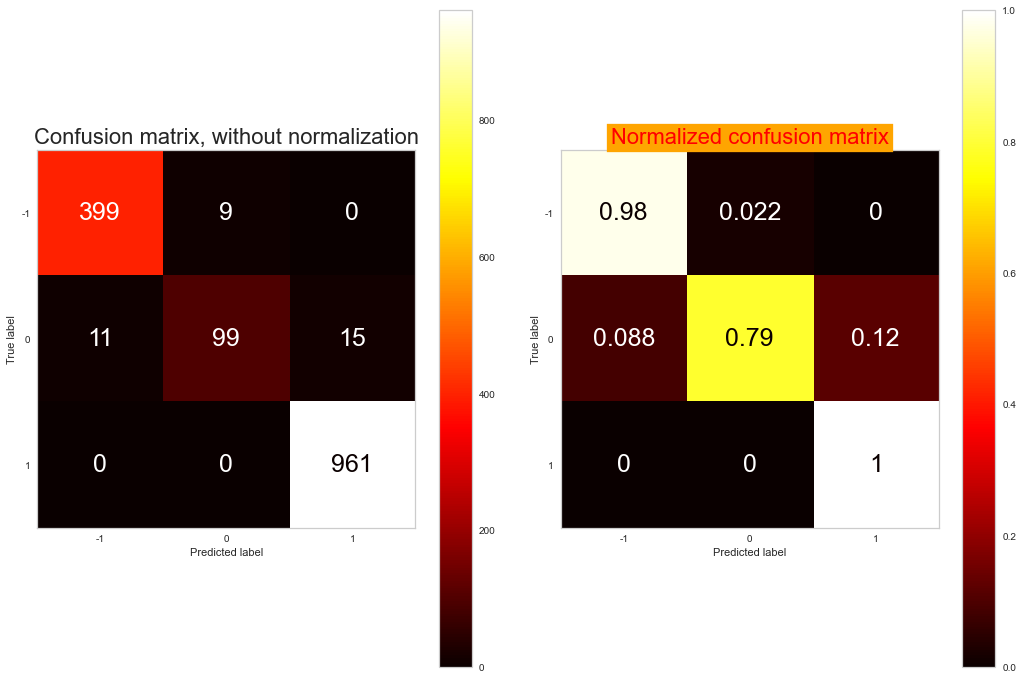

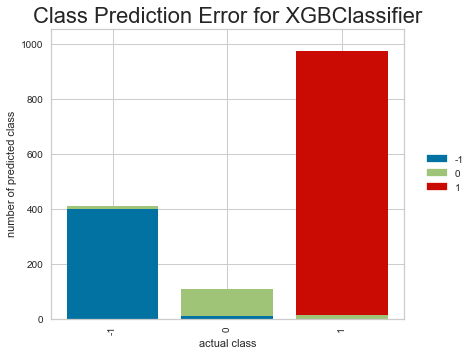

Class counts [1650  471 3853]


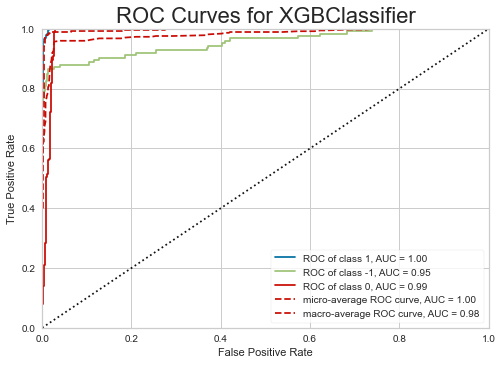

Standardised!!!!!!!!!!
number of train sample in train set: (5974, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 97.71
Log Loss:              0.0791700865157313 * The lower the better.
ROC AUC (One-vs-one) : 0.9765716097746765  * The higher the better.
ROC AUC (One-vs-rest): 0.9803668502931683  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.97      0.98      0.98       408
           0       0.92      0.79      0.85       125
           1       0.98      1.00      0.99       961

    accuracy                           0.98      1494
   macro avg       0.96      0.92      0.94      1494
weighted avg       0.98      0.98      0.98      1494

-----------------------------------------------------------------


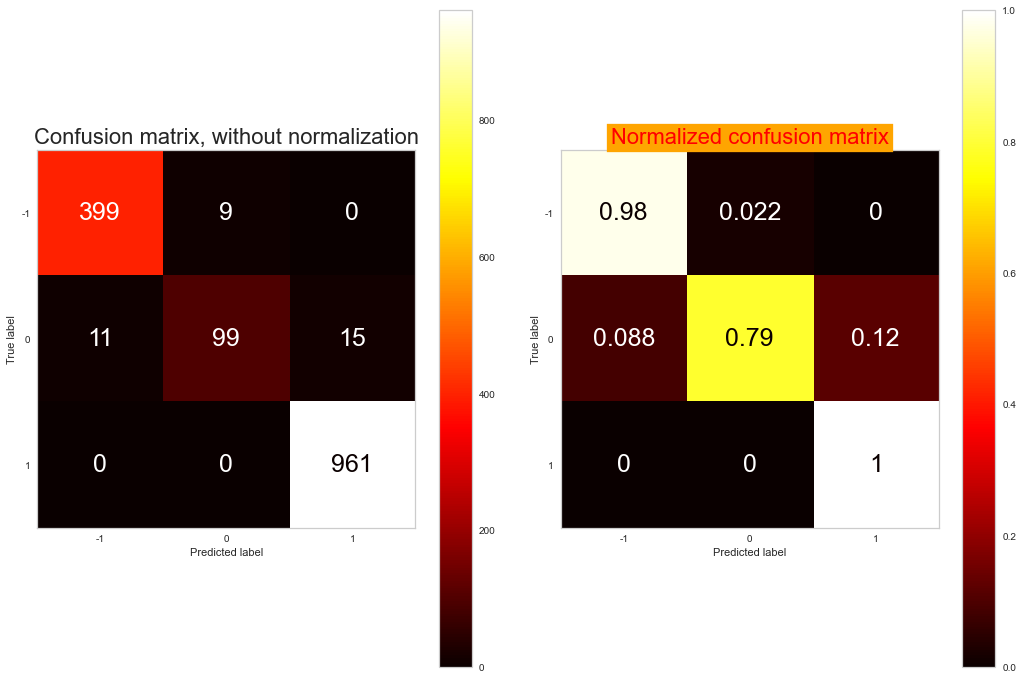

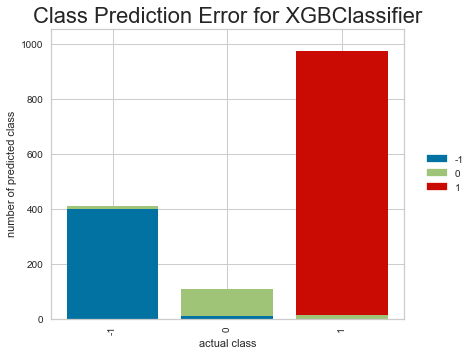

Class counts [1650  471 3853]


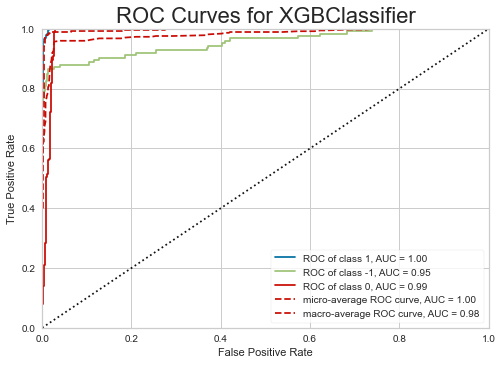

In [332]:
for k,v in dictionary.items():
    if k == "unscaled":
        boost.fit(v[0], b_train)
        pred = boost.predict(v[1])
        pred_proba = boost.predict_proba(v[1])
        # metricss(a_train_stand, b_train, a_test_stand, b_test, b_pred_rf, b_pred_proba_rf,       model): 
        print(Back.GREEN+"\033[1mNot scaled!!!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  boost)
    elif k == "normalised":
        boost.fit(v[0], b_train)
        pred = boost.predict(v[1])
        pred_proba = boost.predict_proba(v[1])
        print(Back.GREEN+"\033[1mNormalised!!!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  boost)
    else:
        boost.fit(v[0], b_train)
        pred = boost.predict(v[1])
        pred_proba = boost.predict_proba(v[1])
        print(Back.GREEN+"\033[1mStandardised!!!!!!!!!!\033[0m")
        metricss(v[0],            b_train, v[1],         b_test, pred,         pred_proba,  boost)

SmoteTomek tuned!!!!!!!!!!
number of train sample in train set: (11523, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 94.03
Log Loss:              0.13679532512239795 * The lower the better.
ROC AUC (One-vs-one) : 0.973639091224419  * The higher the better.
ROC AUC (One-vs-rest): 0.9776815108827893  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.99      0.94      0.96       408
           0       0.80      0.84      0.82       125
           1       0.98      1.00      0.99       961

    accuracy                           0.97      1494
   macro avg       0.92      0.93      0.93      1494
weighted avg       0.97      0.97      0.97      1494

-----------------------------------------------------------------


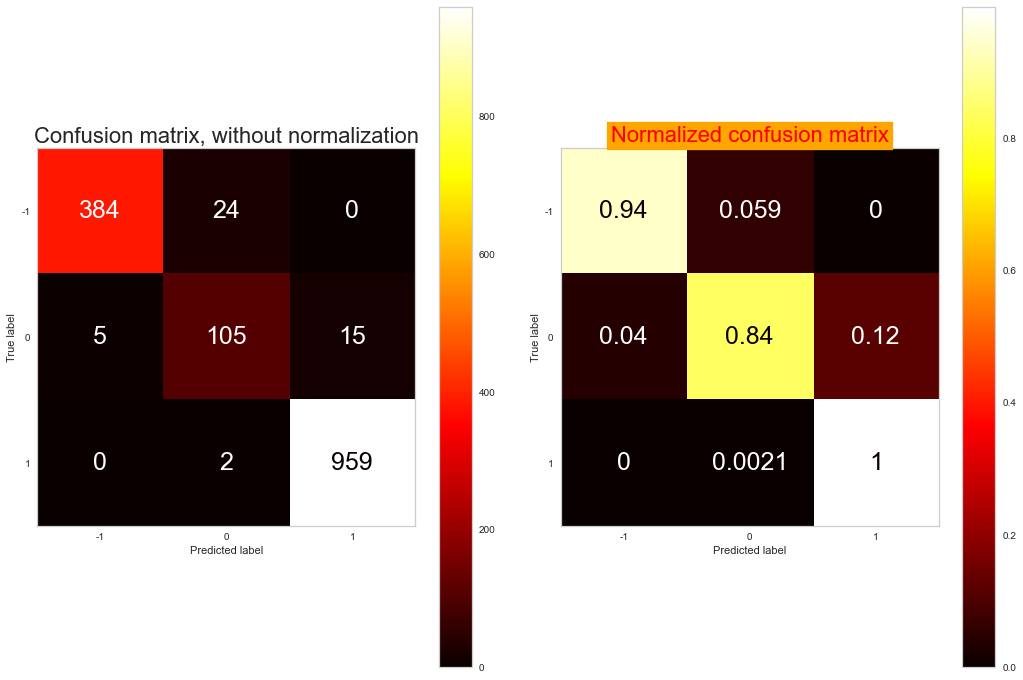

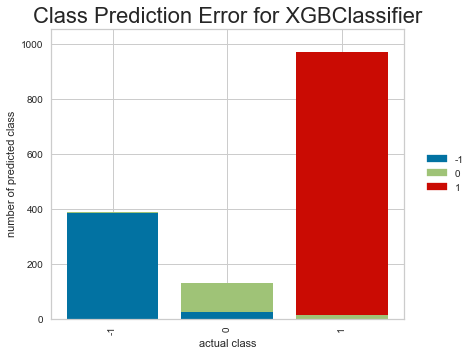

Class counts [3848 3840 3835]


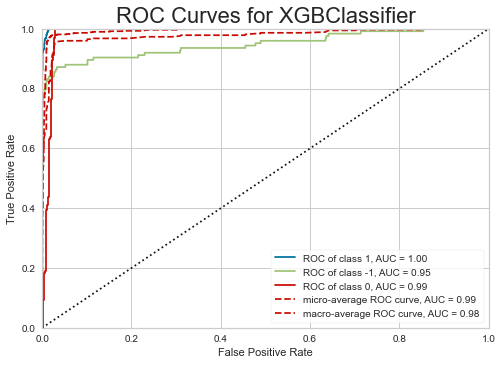

In [333]:
boost_smote = XGBClassifier( learning_rate=0.5, max_depth=1, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0,random_state =42)
boost_smote.fit(a_train_smtom, b_train_smtom)
b_pred_boost_smote      = boost_smote.predict(a_test_stand)
b_pred_proba_boost_smote = boost_smote.predict_proba(a_test_stand)

# def metricss(a_train_stand, b_train,       a_test_stand, b_test, b_pred_rf,             b_pred_proba_rf,              model): 
print(Back.GREEN+"\033[1mSmoteTomek tuned!!!!!!!!!!\033[0m")
metricss(      a_train_smtom, b_train_smtom, a_test_stand, b_test, b_pred_boost_smote, b_pred_proba_boost_smote, boost_smote)

## TPOT already tuned for me... no need to tune further

# Neural Network

In [341]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [355]:
a_train_smtom.shape

(11523, 24)

In [356]:
b_train_smtom.shape

(11523,)

In [392]:
ker = a_train_smtom.to_numpy().reshape(-1,24)
ker.shape

(11523, 24)

In [393]:
kerr = b_train_smtom.to_numpy().reshape(-1,1)
kerr.shape

(11523, 1)

In [397]:
encoder = LabelEncoder()
encoder.fit(kerr)
encoded_Y = encoder.transform(kerr)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(kerr)

In [406]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset
# encode class values as integers

 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=24, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, ker, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: nan% (nan%)


In [404]:
# compile the keras model
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.fit(ker, kerr, epochs=150, batch_size=10)
_, accuracy = model.evaluate(ker, kerr)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
1153/1153 [==============================] - 4s 555us/step - loss: 0.0000e+00 - accuracy: 0.3425
Epoch 2/150
1153/1153 [==============================] - 1s 544us/step - loss: 0.0000e+00 - accuracy: 0.3364
Epoch 3/150
1153/1153 [==============================] - 1s 548us/step - loss: 0.0000e+00 - accuracy: 0.3448
Epoch 4/150
1153/1153 [==============================] - 1s 584us/step - loss: 0.0000e+00 - accuracy: 0.3331
Epoch 5/150
1153/1153 [==============================] - 1s 544us/step - loss: 0.0000e+00 - accuracy: 0.3314
Epoch 6/150
1153/1153 [==============================] - 1s 539us/step - loss: 0.0000e+00 - accuracy: 0.3237
Epoch 7/150
1153/1153 [==============================] - 1s 551us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 8/150
1153/1153 [==============================] - 1s 555us/step - loss: 0.0000e+00 - accuracy: 0.3362
Epoch 9/150
1153/1153 [==============================] - 1s 683us/step - loss: 0.0000e+00 - accuracy: 0.3289
Epoch 10/150
1153/1

## What a horrible score!

### Voting classifier to balance out results

In [411]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators = [('xgb', boost_smote), ('rf', random_forest_smote_tuned), ('svc', support_vector_tuned)], voting='soft')
ensemble_model.fit(a_train_smtom,b_train_smtom)
predicted_labels = ensemble_model.predict(a_test_stand)

number of train sample in train set: (11523, 24)
Number of samples in validation set: (1494,)
TRAINing with RF.score: 95.7
Log Loss:              0.13241614873437557 * The lower the better.
ROC AUC (One-vs-one) : 0.9791001033781531  * The higher the better.
ROC AUC (One-vs-rest): 0.9833626018246715  * same ^
-----------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.99      0.94      0.97       408
           0       0.82      0.86      0.84       125
           1       0.98      1.00      0.99       961

    accuracy                           0.97      1494
   macro avg       0.93      0.94      0.93      1494
weighted avg       0.97      0.97      0.97      1494

-----------------------------------------------------------------


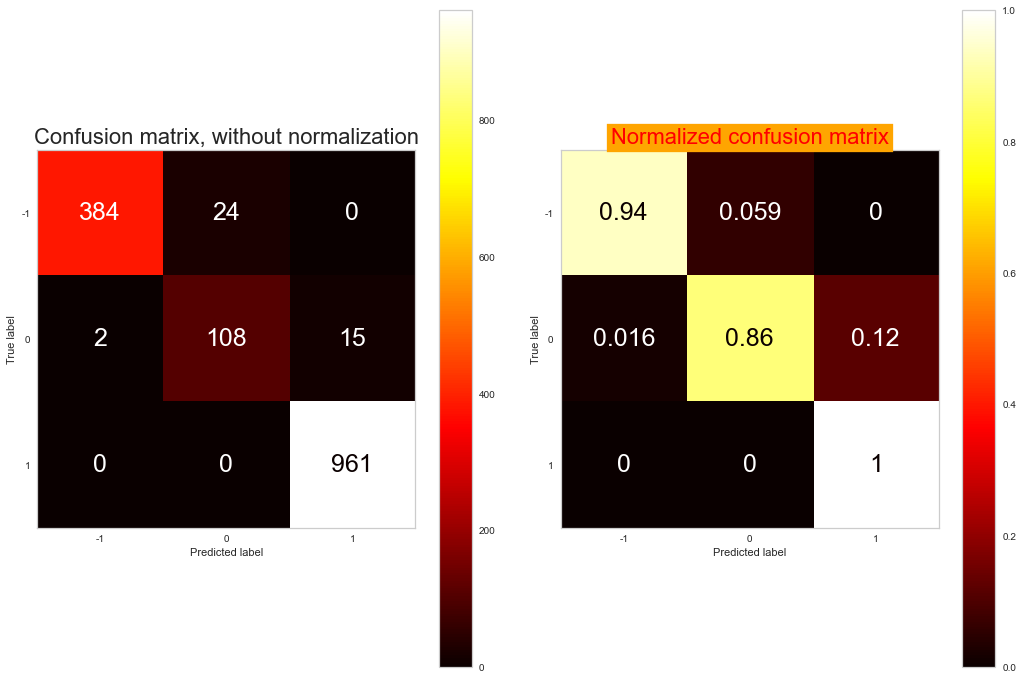

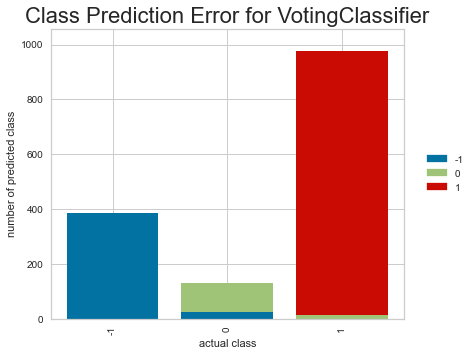

Class counts [3848 3840 3835]


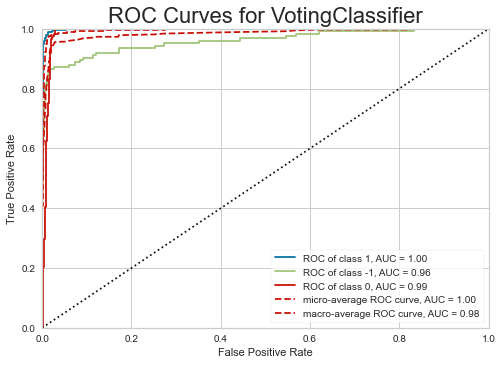

In [412]:
predicted_labels_proba=ensemble_model.predict_proba(a_test_stand)
metricss(a_train_smtom,b_train_smtom,a_test_stand, b_test, predicted_labels, predicted_labels_proba, ensemble_model)

### Not much difference